In [397]:
import numpy as np
import pandas as pd

In [398]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Setting max display columns and rows.
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 0)

In [399]:
data=pd.read_csv('telecom_churn_data.csv')
data.head()

print(data.info())
def metadata_matrix(data) : 
    return pd.DataFrame({
                'Datatype' : data.dtypes.astype(str), 
                'Non_Null_Count': data.count(axis = 0).astype(int), 
                'Null_Count': data.isnull().sum().astype(int), 
                'Null_Percentage': round(data.isnull().sum()/len(data) * 100 , 2), 
                'Unique_Values_Count': data.nunique().astype(int) 
                 }).sort_values(by='Null_Percentage', ascending=False)

metadata_matrix(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None


,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_3g_6,float64,25153,74846,74.85,7418
night_pck_user_6,float64,25153,74846,74.85,2
total_rech_data_6,float64,25153,74846,74.85,37
arpu_2g_6,float64,25153,74846,74.85,6990
max_rech_data_6,float64,25153,74846,74.85,48
...,...,...,...,...,...
max_rech_amt_7,int64,99999,0,0.00,183
max_rech_amt_6,int64,99999,0,0.00,202
total_rech_amt_9,int64,99999,0,0.00,2304
total_rech_amt_8,int64,99999,0,0.00,2347


In [400]:
data=pd.read_csv('telecom_churn_data.csv')
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,...,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,...,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,...,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,...,0.00,0.00,8.42,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [401]:
print(data.info())
def metadata_matrix(data) : 
    return pd.DataFrame({
                'Datatype' : data.dtypes.astype(str), 
                'Non_Null_Count': data.count(axis = 0).astype(int), 
                'Null_Count': data.isnull().sum().astype(int), 
                'Null_Percentage': round(data.isnull().sum()/len(data) * 100 , 2), 
                'Unique_Values_Count': data.nunique().astype(int) 
                 }).sort_values(by='Null_Percentage', ascending=False)

metadata_matrix(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None


,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_3g_6,float64,25153,74846,74.85,7418
night_pck_user_6,float64,25153,74846,74.85,2
total_rech_data_6,float64,25153,74846,74.85,37
arpu_2g_6,float64,25153,74846,74.85,6990
max_rech_data_6,float64,25153,74846,74.85,48
...,...,...,...,...,...
max_rech_amt_7,int64,99999,0,0.00,183
max_rech_amt_6,int64,99999,0,0.00,202
total_rech_amt_9,int64,99999,0,0.00,2304
total_rech_amt_8,int64,99999,0,0.00,2347


# DATA CLEANING

In [402]:
data['mobile_number'].value_counts().sum()

99999

In [403]:
data = data.set_index('mobile_number')

In [404]:
data = data.rename({'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8', 'sep_vbc_3g' : 'vbc_3g_9'}, axis=1)

In [405]:
columns=data.columns
change_to_cat=[]
single_value_col=[]
for column in columns:
    unique_value_count=data[column].nunique()
    if unique_value_count==1:
        single_value_col.append(column)
    if unique_value_count<=29 and unique_value_count!=0 and data[column].dtype in ['int','float']:
        change_to_cat.append(column)
print( ' Columns to change to categorical data type : \n' ,pd.DataFrame(change_to_cat), '\n')

 Columns to change to categorical data type : 
                    0
0     loc_og_t2o_mou
1     std_og_t2o_mou
2     loc_ic_t2o_mou
3   std_og_t2c_mou_6
4   std_og_t2c_mou_7
5   std_og_t2c_mou_8
6   std_og_t2c_mou_9
7   std_ic_t2o_mou_6
8   std_ic_t2o_mou_7
9   std_ic_t2o_mou_8
10  std_ic_t2o_mou_9
11   count_rech_3g_6
12   count_rech_3g_7
13   count_rech_3g_8
14   count_rech_3g_9
15  night_pck_user_6
16  night_pck_user_7
17  night_pck_user_8
18  night_pck_user_9
19         fb_user_6
20         fb_user_7
21         fb_user_8
22         fb_user_9 



In [406]:
data[change_to_cat]=data[change_to_cat].astype('category')

In [407]:
sachet_columns = data.filter(regex='.*sachet.*', axis=1).columns.values
data[sachet_columns] = data[sachet_columns].astype('category')

In [408]:
columns=data.columns
col_with_date=[]
import re
for column in columns:
    x = re.findall("^date", column)
    if x:
        col_with_date.append(column)
data[col_with_date].dtypes

date_of_last_rech_6         object
date_of_last_rech_7         object
date_of_last_rech_8         object
date_of_last_rech_9         object
date_of_last_rech_data_6    object
date_of_last_rech_data_7    object
date_of_last_rech_data_8    object
date_of_last_rech_data_9    object
dtype: object

In [409]:
data[col_with_date].head()


,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
mobile_number,,,,,,,,
7000842753,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
7001865778,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN
7001625959,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014
7001204172,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN
7000142493,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN


In [410]:
for col in col_with_date:
    data[col]=pd.to_datetime(data[col], format="%m/%d/%Y")
data[col_with_date].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
mobile_number,,,,,,,,
7000842753,2014-06-21,2014-07-16,2014-08-08,2014-09-28,2014-06-21,2014-07-16,2014-08-08,NaT
7001865778,2014-06-29,2014-07-31,2014-08-28,2014-09-30,NaT,2014-07-25,2014-08-10,NaT
7001625959,2014-06-17,2014-07-24,2014-08-14,2014-09-29,NaT,NaT,NaT,2014-09-17
7001204172,2014-06-28,2014-07-31,2014-08-31,2014-09-30,NaT,NaT,NaT,NaT
7000142493,2014-06-26,2014-07-28,2014-08-09,2014-09-28,2014-06-04,NaT,NaT,NaT


# Filtering High Value Customers

In [411]:
data['Average_rech_amt_6n7']=(data['total_rech_amt_6']+data['total_rech_amt_7'])/2

In [412]:
data=data[(data['Average_rech_amt_6n7']>= data['Average_rech_amt_6n7'].quantile(0.7))]

# Missing Values

In [413]:
missing_values = metadata_matrix(data)[['Datatype', 'Null_Percentage']].sort_values(by='Null_Percentage', ascending=False)
missing_values


,Datatype,Null_Percentage
av_rech_amt_data_6,float64,62.02
count_rech_2g_6,float64,62.02
arpu_2g_6,float64,62.02
max_rech_data_6,float64,62.02
night_pck_user_6,category,62.02
...,...,...
total_rech_num_8,int64,0.00
total_rech_num_7,int64,0.00
total_rech_num_6,int64,0.00
total_ic_mou_9,float64,0.00


In [414]:
metadata = metadata_matrix(data)
condition = metadata['Null_Percentage'] > 50 
high_missing_values = metadata[condition]
high_missing_values

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
av_rech_amt_data_6,float64,11397,18614,62.02,794
count_rech_3g_6,category,11397,18614,62.02,25
count_rech_2g_6,float64,11397,18614,62.02,30
arpu_2g_6,float64,11397,18614,62.02,4503
max_rech_data_6,float64,11397,18614,62.02,43
night_pck_user_6,category,11397,18614,62.02,2
date_of_last_rech_data_6,datetime64[ns],11397,18614,62.02,30
total_rech_data_6,float64,11397,18614,62.02,36
arpu_3g_6,float64,11397,18614,62.02,4875
fb_user_6,category,11397,18614,62.02,2


In [415]:
high_missing_value_columns = high_missing_values.index 
data.drop(columns=high_missing_value_columns, inplace=True)

In [416]:
metadata_matrix(data)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_ic_t2o_mou_9,category,28307,1704,5.68,1
spl_og_mou_9,float64,28307,1704,5.68,2966
isd_og_mou_9,float64,28307,1704,5.68,908
roam_ic_mou_9,float64,28307,1704,5.68,3370
std_og_mou_9,float64,28307,1704,5.68,15900
...,...,...,...,...,...
max_rech_amt_8,int64,30011,0,0.00,182
max_rech_amt_9,int64,30011,0,0.00,186
last_day_rch_amt_6,int64,30011,0,0.00,158
last_day_rch_amt_7,int64,30011,0,0.00,149


# Imputation

In [417]:
sixth_month_columns = []
for column in data.columns:
    x = re.search("6$", column)
    if x:
        sixth_month_columns.append(column)
# missing_values.loc[sixth_month_columns].sort_values(by='Null_Percentage', ascending=False)
metadata = metadata_matrix(data)
condition = metadata.index.isin(sixth_month_columns)
sixth_month_metadata = metadata[condition]
sixth_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_ic_mou_6,float64,29695,316,1.05,8391
offnet_mou_6,float64,29695,316,1.05,22454
std_ic_t2f_mou_6,float64,29695,316,1.05,2033
isd_ic_mou_6,float64,29695,316,1.05,3429
ic_others_6,float64,29695,316,1.05,1227
onnet_mou_6,float64,29695,316,1.05,18813
std_ic_t2m_mou_6,float64,29695,316,1.05,6680
loc_ic_t2t_mou_6,float64,29695,316,1.05,9872
loc_ic_t2m_mou_6,float64,29695,316,1.05,16015
loc_ic_t2f_mou_6,float64,29695,316,1.05,4817


In [418]:
sixth_month_meaningful_missing_condition = sixth_month_metadata['Null_Percentage'] == 1.05
sixth_month_meaningful_missing_cols = sixth_month_metadata[sixth_month_meaningful_missing_condition].index.values
sixth_month_meaningful_missing_cols

array(['std_ic_mou_6', 'offnet_mou_6', 'std_ic_t2f_mou_6', 'isd_ic_mou_6',
       'ic_others_6', 'onnet_mou_6', 'std_ic_t2m_mou_6',
       'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6',
       'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'og_others_6', 'spl_og_mou_6',
       'roam_ic_mou_6', 'spl_ic_mou_6', 'std_og_t2t_mou_6',
       'loc_og_t2c_mou_6', 'std_og_t2m_mou_6', 'loc_og_t2f_mou_6',
       'std_og_t2f_mou_6', 'loc_og_t2m_mou_6', 'std_ic_t2o_mou_6',
       'std_og_t2c_mou_6', 'std_og_mou_6', 'loc_og_t2t_mou_6',
       'isd_og_mou_6', 'roam_og_mou_6', 'loc_og_mou_6'], dtype=object)

In [419]:
condition = data[sixth_month_meaningful_missing_cols].isnull()

In [420]:
missing_rows = pd.Series([True]*data.shape[0], index = data.index)
for column in sixth_month_meaningful_missing_cols : 
    missing_rows = missing_rows & data[column].isnull()

print('Total outgoing mou for each customer with missing *_mou data is ', data.loc[missing_rows,'total_og_mou_6'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', data.loc[missing_rows,'total_ic_mou_6'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


In [421]:
data[sixth_month_meaningful_missing_cols] = data[sixth_month_meaningful_missing_cols].fillna(0)

metadata = metadata_matrix(data)

# Remaining Missing Values
metadata.iloc[metadata.index.isin(sixth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_6,datetime64[ns],29949,62,0.21,30
monthly_2g_6,int64,30011,0,0.00,5
vbc_3g_6,float64,30011,0,0.00,6864
max_rech_amt_6,int64,30011,0,0.00,170
sachet_3g_6,category,30011,0,0.00,25
sachet_2g_6,category,30011,0,0.00,30
vol_2g_mb_6,float64,30011,0,0.00,7809
monthly_3g_6,int64,30011,0,0.00,12
vol_3g_mb_6,float64,30011,0,0.00,7043
last_day_rch_amt_6,int64,30011,0,0.00,158


In [422]:
condition = data['date_of_last_rech_6'].isnull()
data[condition].filter(regex='.*rech.*6$', axis=1).head()

,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6
mobile_number,,,,
7001588448,0,0,0,NaT
7001223277,0,0,0,NaT
7000721536,0,0,0,NaT
7001490351,0,0,0,NaT
7000665415,0,0,0,NaT


In [423]:
data[condition].filter(regex='.*rech.*6$', axis=1).nunique()

total_rech_num_6       1
total_rech_amt_6       1
max_rech_amt_6         1
date_of_last_rech_6    0
dtype: int64

In [424]:
metadata = metadata_matrix(data)
metadata[metadata.index.isin(sixth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_6,datetime64[ns],29949,62,0.21,30
monthly_2g_6,int64,30011,0,0.00,5
vbc_3g_6,float64,30011,0,0.00,6864
max_rech_amt_6,int64,30011,0,0.00,170
sachet_3g_6,category,30011,0,0.00,25
sachet_2g_6,category,30011,0,0.00,30
vol_2g_mb_6,float64,30011,0,0.00,7809
monthly_3g_6,int64,30011,0,0.00,12
vol_3g_mb_6,float64,30011,0,0.00,7043
last_day_rch_amt_6,int64,30011,0,0.00,158


In [425]:
seventh_month_columns = data.filter(regex='7$', axis=1).columns
seventh_month_columns

Index(['last_date_of_month_7', 'arpu_7', 'onnet_mou_7', 'offnet_mou_7',
       'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7',
       'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7',
       'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'isd_og_mou_7',
       'spl_og_mou_7', 'og_others_7', 'total_og_mou_7', 'loc_ic_t2t_mou_7',
       'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7',
       'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7',
       'std_ic_t2o_mou_7', 'std_ic_mou_7', 'total_ic_mou_7', 'spl_ic_mou_7',
       'isd_ic_mou_7', 'ic_others_7', 'total_rech_num_7', 'total_rech_amt_7',
       'max_rech_amt_7', 'date_of_last_rech_7', 'last_day_rch_amt_7',
       'vol_2g_mb_7', 'vol_3g_mb_7', 'monthly_2g_7', 'sachet_2g_7',
       'monthly_3g_7', 'sachet_3g_7', 'vbc_3g_7', 'Average_rech_amt_6n7'],
      dtype='object')

In [426]:
seventh_month_metadata = metadata[metadata.index.isin(seventh_month_columns)]
seventh_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
loc_ic_t2t_mou_7,float64,29708,303,1.01,9961
og_others_7,float64,29708,303,1.01,123
loc_ic_t2f_mou_7,float64,29708,303,1.01,4897
loc_ic_t2m_mou_7,float64,29708,303,1.01,16068
loc_ic_mou_7,float64,29708,303,1.01,19030
std_ic_t2t_mou_7,float64,29708,303,1.01,4706
std_ic_t2f_mou_7,float64,29708,303,1.01,2075
std_ic_t2o_mou_7,category,29708,303,1.01,1
std_ic_mou_7,float64,29708,303,1.01,8543
spl_ic_mou_7,float64,29708,303,1.01,93


In [427]:
seventh_month_meaningful_missing_condition = seventh_month_metadata['Null_Percentage'] == 1.01
seventh_month_meaningful_missing_cols = seventh_month_metadata[seventh_month_meaningful_missing_condition].index.values
seventh_month_meaningful_missing_cols

array(['loc_ic_t2t_mou_7', 'og_others_7', 'loc_ic_t2f_mou_7',
       'loc_ic_t2m_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7',
       'std_ic_t2f_mou_7', 'std_ic_t2o_mou_7', 'std_ic_mou_7',
       'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7', 'std_ic_t2m_mou_7',
       'isd_og_mou_7', 'spl_og_mou_7', 'std_og_t2f_mou_7', 'onnet_mou_7',
       'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7',
       'loc_og_t2t_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7',
       'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7',
       'loc_og_t2m_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7'],
      dtype=object)

In [428]:
condition = data[seventh_month_meaningful_missing_cols].isnull()

# Rows is null for all the above columns 
missing_rows = pd.Series([True]*data.shape[0], index = data.index)
for column in seventh_month_meaningful_missing_cols : 
    missing_rows = missing_rows & data[column].isnull()

print('Total outgoing mou for each customer with missing *_mou data is ', data.loc[missing_rows,'total_og_mou_7'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', data.loc[missing_rows,'total_ic_mou_7'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


In [429]:
data[seventh_month_meaningful_missing_cols] = data[seventh_month_meaningful_missing_cols].fillna(0)



In [430]:
metadata = metadata_matrix(data)
metadata.iloc[metadata.index.isin(seventh_month_columns)]


,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_7,datetime64[ns],29897,114,0.38,31
last_date_of_month_7,object,29980,31,0.10,1
total_rech_num_7,int64,30011,0,0.00,101
ic_others_7,float64,30011,0,0.00,1371
isd_ic_mou_7,float64,30011,0,0.00,3639
spl_ic_mou_7,float64,30011,0,0.00,93
total_rech_amt_7,int64,30011,0,0.00,2265
sachet_2g_7,category,30011,0,0.00,34
monthly_3g_7,int64,30011,0,0.00,15
sachet_3g_7,category,30011,0,0.00,27


In [431]:
condition = data['date_of_last_rech_7'].isnull()
data[condition].filter(regex='.*rech.*7$', axis=1).head()

,total_rech_num_7,total_rech_amt_7,max_rech_amt_7,date_of_last_rech_7,Average_rech_amt_6n7
mobile_number,,,,,
7000369789,0,0,0,NaT,393.0
7001967148,0,0,0,NaT,500.5
7000066601,0,0,0,NaT,490.0
7001189556,0,0,0,NaT,523.5
7002024450,0,0,0,NaT,493.0


In [432]:
data[condition].filter(regex='.*rech.*7$', axis=1).nunique()

total_rech_num_7         1
total_rech_amt_7         1
max_rech_amt_7           1
date_of_last_rech_7      0
Average_rech_amt_6n7    90
dtype: int64

In [433]:
eighth_month_columns = data.filter(regex="8$", axis=1).columns
metadata = metadata_matrix(data)
condition = metadata.index.isin(eighth_month_columns)
eighth_month_metadata = metadata[condition]
eighth_month_metadata


,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_og_t2c_mou_8,category,29073,938,3.13,1
std_og_mou_8,float64,29073,938,3.13,16864
isd_og_mou_8,float64,29073,938,3.13,940
loc_ic_mou_8,float64,29073,938,3.13,18573
std_og_t2m_mou_8,float64,29073,938,3.13,13326
loc_ic_t2m_mou_8,float64,29073,938,3.13,15598
loc_og_mou_8,float64,29073,938,3.13,18885
std_og_t2t_mou_8,float64,29073,938,3.13,11781
std_og_t2f_mou_8,float64,29073,938,3.13,1627
loc_ic_t2f_mou_8,float64,29073,938,3.13,4705


In [434]:
eighth_month_meaningful_missing_condition = eighth_month_metadata['Null_Percentage'] == 3.13
eighth_month_meaningful_missing_cols = eighth_month_metadata[eighth_month_meaningful_missing_condition].index.values
eighth_month_meaningful_missing_cols

array(['std_og_t2c_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'loc_ic_mou_8',
       'std_og_t2m_mou_8', 'loc_ic_t2m_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2f_mou_8', 'loc_ic_t2f_mou_8',
       'loc_og_t2c_mou_8', 'ic_others_8', 'loc_og_t2m_mou_8',
       'spl_og_mou_8', 'roam_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8',
       'std_ic_t2o_mou_8', 'onnet_mou_8', 'loc_og_t2f_mou_8',
       'offnet_mou_8', 'std_ic_t2f_mou_8', 'og_others_8',
       'loc_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2t_mou_8',
       'roam_og_mou_8', 'isd_ic_mou_8', 'loc_og_t2t_mou_8'], dtype=object)

In [435]:
condition = data[eighth_month_meaningful_missing_cols].isnull()

# Rows is null for all the above columns 
missing_rows = pd.Series([True]*data.shape[0], index = data.index)
for column in eighth_month_meaningful_missing_cols : 
    missing_rows = missing_rows & data[column].isnull()

print('Total outgoing mou for each customer with missing *_mou data is ', data.loc[missing_rows,'total_og_mou_8'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', data.loc[missing_rows,'total_ic_mou_8'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


In [436]:
data[eighth_month_meaningful_missing_cols] = data[eighth_month_meaningful_missing_cols].fillna(0)

metadata = metadata_matrix(data)

# Remaining Missing Values
metadata.iloc[metadata.index.isin(eighth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_8,datetime64[ns],29417,594,1.98,31
last_date_of_month_8,object,29854,157,0.52,1
spl_ic_mou_8,float64,30011,0,0.00,85
total_rech_num_8,int64,30011,0,0.00,96
std_ic_t2f_mou_8,float64,30011,0,0.00,1941
ic_others_8,float64,30011,0,0.00,1259
std_ic_t2o_mou_8,category,30011,0,0.00,1
std_ic_mou_8,float64,30011,0,0.00,8033
total_ic_mou_8,float64,30011,0,0.00,20096
isd_ic_mou_8,float64,30011,0,0.00,3493


In [437]:
condition = data['date_of_last_rech_8'].isnull()
data[condition].filter(regex='.*rech.*8$', axis=1).head()

,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8
mobile_number,,,,
7000340381,0,0,0,NaT
7000608224,0,0,0,NaT
7000369789,0,0,0,NaT
7000248548,0,0,0,NaT
7001967063,0,0,0,NaT


In [438]:
data[condition].filter(regex='.*rech.*8$', axis=1).nunique()

total_rech_num_8       1
total_rech_amt_8       1
max_rech_amt_8         1
date_of_last_rech_8    0
dtype: int64

In [439]:
ninth_month_columns = data.filter(regex="9$", axis=1).columns
metadata = metadata_matrix(data)
condition = metadata.index.isin(ninth_month_columns)
ninth_month_metadata = metadata[condition]
ninth_month_metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_og_t2c_mou_9,category,28307,1704,5.68,1
spl_ic_mou_9,float64,28307,1704,5.68,287
loc_og_t2m_mou_9,float64,28307,1704,5.68,15585
og_others_9,float64,28307,1704,5.68,132
loc_og_t2c_mou_9,float64,28307,1704,5.68,1576
isd_ic_mou_9,float64,28307,1704,5.68,3329
loc_og_t2t_mou_9,float64,28307,1704,5.68,10360
spl_og_mou_9,float64,28307,1704,5.68,2966
loc_ic_t2t_mou_9,float64,28307,1704,5.68,9407
loc_og_mou_9,float64,28307,1704,5.68,18207


In [440]:
ninth_month_meaningful_missing_condition = ninth_month_metadata['Null_Percentage'] == 5.68
ninth_month_meaningful_missing_cols = ninth_month_metadata[ninth_month_meaningful_missing_condition].index.values
ninth_month_meaningful_missing_cols

array(['std_og_t2c_mou_9', 'spl_ic_mou_9', 'loc_og_t2m_mou_9',
       'og_others_9', 'loc_og_t2c_mou_9', 'isd_ic_mou_9',
       'loc_og_t2t_mou_9', 'spl_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_og_mou_9', 'roam_og_mou_9', 'std_ic_mou_9',
       'loc_ic_t2m_mou_9', 'roam_ic_mou_9', 'std_og_t2t_mou_9',
       'offnet_mou_9', 'loc_ic_t2f_mou_9', 'std_ic_t2f_mou_9',
       'isd_og_mou_9', 'std_og_mou_9', 'std_og_t2f_mou_9', 'ic_others_9',
       'std_ic_t2t_mou_9', 'std_ic_t2o_mou_9', 'loc_og_t2f_mou_9',
       'std_og_t2m_mou_9', 'loc_ic_mou_9', 'std_ic_t2m_mou_9',
       'onnet_mou_9'], dtype=object)

In [441]:
condition = data[ninth_month_meaningful_missing_cols].isnull()

# Rows is null for all the above columns 
missing_rows = pd.Series([True]*data.shape[0], index = data.index)
for column in ninth_month_meaningful_missing_cols : 
    missing_rows = missing_rows & data[column].isnull()

print('Total outgoing mou for each customer with missing *_mou data is ', data.loc[missing_rows,'total_og_mou_9'].unique()[0])
print('Total incoming mou for each customer with missing *_mou data is ', data.loc[missing_rows,'total_ic_mou_9'].unique()[0])

Total outgoing mou for each customer with missing *_mou data is  0.0
Total incoming mou for each customer with missing *_mou data is  0.0


In [442]:
data[ninth_month_meaningful_missing_cols] = data[ninth_month_meaningful_missing_cols].fillna(0)

metadata = metadata_matrix(data)

# Remaining Missing Values
metadata.iloc[metadata.index.isin(ninth_month_columns)]

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_9,datetime64[ns],29145,866,2.89,30
last_date_of_month_9,object,29651,360,1.20,1
spl_ic_mou_9,float64,30011,0,0.00,287
total_ic_mou_9,float64,30011,0,0.00,19437
std_ic_mou_9,float64,30011,0,0.00,7745
isd_ic_mou_9,float64,30011,0,0.00,3329
ic_others_9,float64,30011,0,0.00,1284
loc_ic_mou_9,float64,30011,0,0.00,18018
std_ic_t2t_mou_9,float64,30011,0,0.00,4280
std_ic_t2m_mou_9,float64,30011,0,0.00,6168


In [443]:
condition = data['date_of_last_rech_9'].isnull()
data[condition].filter(regex='.*rech.*9$', axis=1).head()

,total_rech_num_9,total_rech_amt_9,max_rech_amt_9,date_of_last_rech_9
mobile_number,,,,
7000340381,0,0,0,NaT
7000854899,0,0,0,NaT
7000369789,0,0,0,NaT
7001967063,0,0,0,NaT
7000066601,0,0,0,NaT


In [444]:
data[condition].filter(regex='.*rech.*9$', axis=1).nunique()

total_rech_num_9       1
total_rech_amt_9       1
max_rech_amt_9         1
date_of_last_rech_9    0
dtype: int64

In [445]:
print('Missing Value Percentage in last_date_of_month columns : \n', 100*data.filter(regex='last_date_of_month_.*', axis=1).isnull().sum() / data.shape[0], '\n')
print('The unique values in last_date_of_month_6 : ' , data['last_date_of_month_6'].unique())
print('The unique values in last_date_of_month_7 : ' , data['last_date_of_month_7'].unique())
print('The unique values in last_date_of_month_8 : ' , data['last_date_of_month_8'].unique())
print('The unique values in last_date_of_month_9 : ' , data['last_date_of_month_9'].unique())

Missing Value Percentage in last_date_of_month columns : 
 last_date_of_month_6    0.000000
last_date_of_month_7    0.103295
last_date_of_month_8    0.523142
last_date_of_month_9    1.199560
dtype: float64 

The unique values in last_date_of_month_6 :  ['6/30/2014']
The unique values in last_date_of_month_7 :  ['7/31/2014' nan]
The unique values in last_date_of_month_8 :  ['8/31/2014' nan]
The unique values in last_date_of_month_9 :  ['9/30/2014' nan]


In [446]:
data['last_date_of_month_7'] = data['last_date_of_month_7'].fillna(data['last_date_of_month_7'].mode()[0])
data['last_date_of_month_8'] = data['last_date_of_month_8'].fillna(data['last_date_of_month_8'].mode()[0])
data['last_date_of_month_9'] = data['last_date_of_month_9'].fillna(data['last_date_of_month_9'].mode()[0])

In [447]:
data['last_date_of_month_7'].unique()



array(['7/31/2014'], dtype=object)

In [448]:
metadata = metadata_matrix(data)
metadata

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_9,datetime64[ns],29145,866,2.89,30
date_of_last_rech_8,datetime64[ns],29417,594,1.98,31
loc_og_t2o_mou,category,29897,114,0.38,1
date_of_last_rech_7,datetime64[ns],29897,114,0.38,31
std_og_t2o_mou,category,29897,114,0.38,1
...,...,...,...,...,...
std_og_mou_7,float64,30011,0,0.00,18445
std_og_mou_8,float64,30011,0,0.00,16864
std_og_mou_9,float64,30011,0,0.00,15900
isd_og_mou_6,float64,30011,0,0.00,1113


In [449]:
print(data[data['date_of_last_rech_6'].isnull()][['date_of_last_rech_6','total_rech_amt_6','total_rech_num_6']].nunique())
print(data[data['date_of_last_rech_7'].isnull()][['date_of_last_rech_7','total_rech_amt_7','total_rech_num_7']].nunique())
print(data[data['date_of_last_rech_8'].isnull()][['date_of_last_rech_8','total_rech_amt_8','total_rech_num_8']].nunique())
print(data[data['date_of_last_rech_9'].isnull()][['date_of_last_rech_9','total_rech_amt_9','total_rech_num_9']].nunique())

date_of_last_rech_6    0
total_rech_amt_6       1
total_rech_num_6       1
dtype: int64
date_of_last_rech_7    0
total_rech_amt_7       1
total_rech_num_7       1
dtype: int64
date_of_last_rech_8    0
total_rech_amt_8       1
total_rech_num_8       1
dtype: int64
date_of_last_rech_9    0
total_rech_amt_9       1
total_rech_num_9       1
dtype: int64


In [450]:
print("\n",data[data['date_of_last_rech_6'].isnull()][['total_rech_amt_6','total_rech_num_6']].head())
print("\n",data[data['date_of_last_rech_7'].isnull()][['total_rech_amt_7','total_rech_num_7']].head())
print("\n",data[data['date_of_last_rech_8'].isnull()][['total_rech_amt_8','total_rech_num_8']].head())
print("\n",data[data['date_of_last_rech_9'].isnull()][['total_rech_amt_9','total_rech_num_9']].head())


                total_rech_amt_6  total_rech_num_6
mobile_number                                    
7001588448                    0                 0
7001223277                    0                 0
7000721536                    0                 0
7001490351                    0                 0
7000665415                    0                 0

                total_rech_amt_7  total_rech_num_7
mobile_number                                    
7000369789                    0                 0
7001967148                    0                 0
7000066601                    0                 0
7001189556                    0                 0
7002024450                    0                 0

                total_rech_amt_8  total_rech_num_8
mobile_number                                    
7000340381                    0                 0
7000608224                    0                 0
7000369789                    0                 0
7000248548                    0             

# Dropping columns with one unique value

In [451]:
metadata=metadata_matrix(data)
singular_value_cols=metadata[metadata['Unique_Values_Count']==1].index.values

In [452]:
data.drop(columns=singular_value_cols,inplace=True)

In [453]:
date_columns = data.filter(regex='^date.*').columns
data.drop(columns=date_columns, inplace=True)
metadata_matrix(data)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_6,float64,30011,0,0.0,29261
total_ic_mou_6,float64,30011,0,0.0,20602
total_ic_mou_8,float64,30011,0,0.0,20096
total_ic_mou_9,float64,30011,0,0.0,19437
spl_ic_mou_6,float64,30011,0,0.0,78
...,...,...,...,...,...
isd_og_mou_6,float64,30011,0,0.0,1113
isd_og_mou_7,float64,30011,0,0.0,1125
isd_og_mou_8,float64,30011,0,0.0,940
isd_og_mou_9,float64,30011,0,0.0,908


#  Tagging Churn (TARGET variable)

In [454]:
data['Churn'] = 0
churned_customers = data.query('total_og_mou_9 == 0 & total_ic_mou_9 == 0 & vol_2g_mb_9 == 0 &  vol_3g_mb_9 == 0').index
data.loc[churned_customers,'Churn']=1
data['Churn'] = data['Churn'].astype('category')

In [455]:
data['Churn'].value_counts(normalize=True).to_frame()

,Churn
0,0.913598
1,0.086402


# Dropping Churn Phase Columns

In [456]:
churn_phase_columns = data.filter(regex='9$').columns
data.drop(columns=churn_phase_columns, inplace=True)
print('Retained Columns')
data.columns.to_frame(index=False)

Retained Columns


,0
0,arpu_6
1,arpu_7
2,arpu_8
3,onnet_mou_6
4,onnet_mou_7
...,...
121,vbc_3g_8
122,vbc_3g_7
123,vbc_3g_6
124,Average_rech_amt_6n7


In [457]:
print('retained no of rows', data.shape[0])
print('retain no of columns', data.shape[1])

retained no of rows 30011
retain no of columns 126


# EDA

In [458]:
data.describe()


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,...,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,Average_rech_amt_6n7
count,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,...,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,587.284404,589.135427,534.857433,296.034461,304.343206,267.600412,417.933372,423.924375,375.021691,17.412764,13.522114,13.25627,29.321648,22.036003,21.469272,94.680696,95.729729,87.139995,181.279583,181.271524,167.591199,6.97933,7.097268,6.494314,1.567160,1.862229,1.712739,282.948414,284.107492,261.233938,189.753131,199.877508,172.196408,203.097767,213.411914,179.568790,2.010766,2.034241,1.789728,394.865994,...,314.875472,295.426531,0.066731,0.018066,0.027660,11.156530,12.360190,11.700835,1.188803,1.476889,1.237756,12.121322,11.913465,10.225317,697.365833,695.962880,613.638799,171.414048,175.661058,162.869348,104.485655,105.287128,95.653294,78.859009,78.171382,69.209105,258.392681,278.093737,269.864111,0.124854,0.131352,0.114058,0.173903,0.185132,0.173203,1264.064776,129.439626,135.127102,121.360548,696.664356
std,442.722413,462.897814,492.259586,460.775592,481.780488,466.560947,470.588583,486.525332,477.489377,79.152657,76.303736,74.55207,118.570414,97.925249,106.244774,236.849265,248.132623,234.721938,250.132066,240.722132,234.862468,22.66552,22.588864,20.220028,6.889317,9.255645,7.397562,379.985249,375.837282,366.539171,409.716719,428.119476,410.033964,413.489240,437.941904,416.752834,12.457422,13.350441,11.700376,606.508681,...,369.654489,360.343153,0.194273,0.181944,0.116574,67.258387,76.992293,74.928607,13.987003,15.406483,12.889879,9.543550,9.605532,9.478572,539.325984,562.143146,601.821630,174.703215,181.545389,172.605809,142.767207,141.148386,145.260363,277.445058,280.331857,268.494284,866.195376,855.682340,859.299266,0.374512,0.387673,0.357272,0.574285,0.620418,0.582932,975.263117,390.478591,408.024394,389.726031,488.782088
min,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0

In [459]:
categorical_columns = data.dtypes[data.dtypes == 'category'].index.values
print('Mode : ')
data[categorical_columns].mode().T

Mode : 


,0
sachet_2g_6,0
sachet_2g_7,0
sachet_2g_8,0
sachet_3g_6,0
sachet_3g_7,0
sachet_3g_8,0
Churn,0


#  Univariate Analysis

In [460]:
churned_customers = data[data['Churn'] == 1]
non_churned_customers = data[data['Churn'] == 0]

# Age on Network

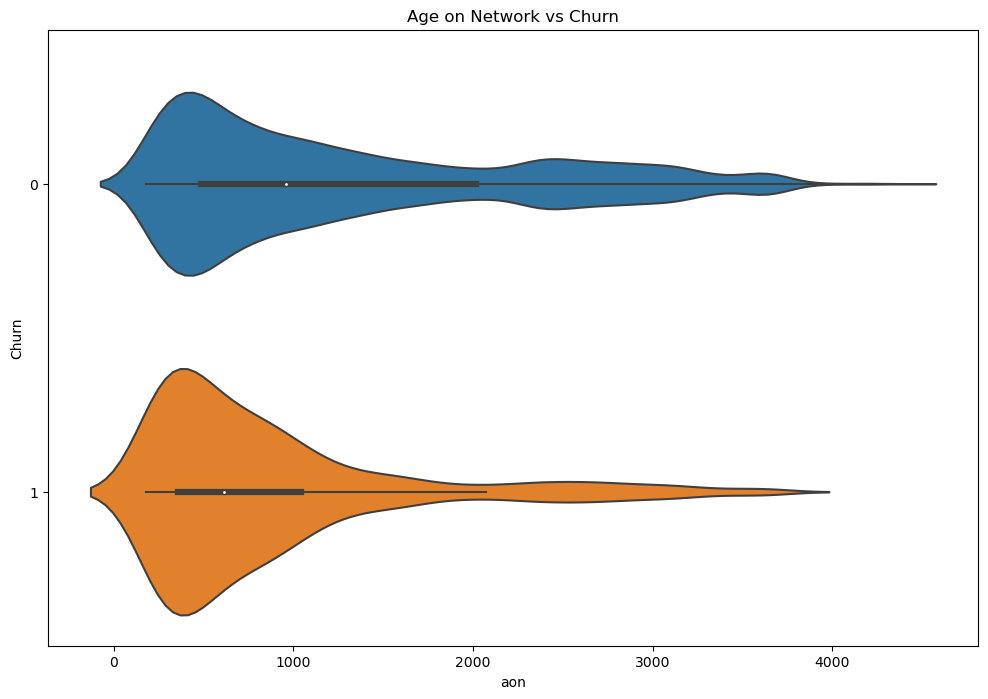

In [461]:
plt.figure(figsize=(12,8))
sns.violinplot(x='aon', y='Churn', data=data)
plt.title('Age on Network vs Churn')
plt.show()

In [462]:
from tabulate import tabulate
def num_univariate_analysis(column_names,scale='linear') : 
    # boxplot for column vs target
    
    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot(1,3,1)
    sns.violinplot(x='Churn', y = column_names[0], data = data, ax=ax1)
    title = ''.join(column_names[0]) +' vs Churn'
    ax1.set(title=title)
    if scale == 'log' :
        plt.yscale('log')
        ax1.set(ylabel= column_names[0] + '(Log Scale)')
        
    ax2 = fig.add_subplot(1,3,2)
    sns.violinplot(x='Churn', y = column_names[1], data = data, ax=ax2)
    title = ''.join(column_names[1]) +' vs Churn'
    ax2.set(title=title)
    if scale == 'log' :
        plt.yscale('log')
        ax2.set(ylabel= column_names[1] + '(Log Scale)')
    
    ax3 = fig.add_subplot(1,3,3)
    sns.violinplot(x='Churn', y = column_names[2], data = data, ax=ax3)
    title = ''.join(column_names[2]) +' vs Churn'
    ax3.set(title=title)
    if scale == 'log' :
        plt.yscale('log')
        ax3.set(ylabel= column_names[2] + '(Log Scale)')
    
    # summary statistic
    
    print('Customers who churned (Churn : 1)')
    print(churned_customers[column_names].describe())
    
    print('\nCustomers who did not churn (Churn : 0)')
    print(non_churned_customers[column_names].describe(),'\n')

In [463]:
!pip install sidetable
import sidetable
def cat_univariate_analysis(column_names,figsize=(16,4)) : 
    
    # column vs target count plot
    fig = plt.figure(figsize=figsize)
    
    ax1 = fig.add_subplot(1,3,1)
    sns.countplot(x=column_names[0],hue='Churn',data=data, ax=ax1)
    title = column_names[0] + ' vs No of Churned Customers'
    ax1.set(title= title)
    ax1.legend(loc='upper right')

    
    ax2 = fig.add_subplot(1,3,2)
    sns.countplot(x=column_names[1],hue='Churn',data=data, ax=ax2)
    title = column_names[1] + ' vs No of Churned Customers'
    ax2.set(title= title)
    ax2.legend(loc='upper right')

        
    ax3 = fig.add_subplot(1,3,3)
    sns.countplot(x=column_names[2],hue='Churn',data=data, ax=ax3)
    title = column_names[2] + ' vs No of Churned Customers'
    ax3.set(title= title)
    ax3.legend(loc='upper right')

        
    # Percentages 
    print('Customers who churned (Churn : 1)')
    print(tabulate(pd.DataFrame(churned_customers.stb.freq([column_names[0]])), headers='keys', tablefmt='psql'),'\n')
    print(tabulate(pd.DataFrame(churned_customers.stb.freq([column_names[1]])), headers='keys', tablefmt='psql'),'\n')
    print(tabulate(pd.DataFrame(churned_customers.stb.freq([column_names[2]])), headers='keys', tablefmt='psql'),'\n')

    print('\nCustomers who did not churn (Churn : 0)')
    print(tabulate(pd.DataFrame(non_churned_customers.stb.freq([column_names[0]])), headers='keys', tablefmt='psql'),'\n')
    print(tabulate(pd.DataFrame(non_churned_customers.stb.freq([column_names[1]])), headers='keys', tablefmt='psql'),'\n')
    print(tabulate(pd.DataFrame(non_churned_customers.stb.freq([column_names[2]])), headers='keys', tablefmt='psql'),'\n')

Customers who churned (Churn : 1)
             arpu_6        arpu_7       arpu_8
count   2593.000000   2593.000000  2593.000000
mean     678.716970    550.511946   243.063343
std      551.792864    517.241221   378.843531
min     -209.465000   -158.963000   -37.887000
25%      396.507000    289.641000     0.000000
50%      573.396000    464.674000   101.894000
75%      819.460000    691.588000   351.028000
max    11505.508000  13224.119000  5228.826000

Customers who did not churn (Churn : 0)
             arpu_6        arpu_7        arpu_8
count  27418.000000  27418.000000  27418.000000
mean     578.637360    592.788162    562.453248
std      429.988265    457.265996    492.802655
min    -2258.709000  -2014.045000   -945.808000
25%      362.218000    369.610500    319.118500
50%      489.324000    496.182500    471.024000
75%      690.891750    701.418000    690.921000
max    27731.088000  35145.834000  33543.624000 



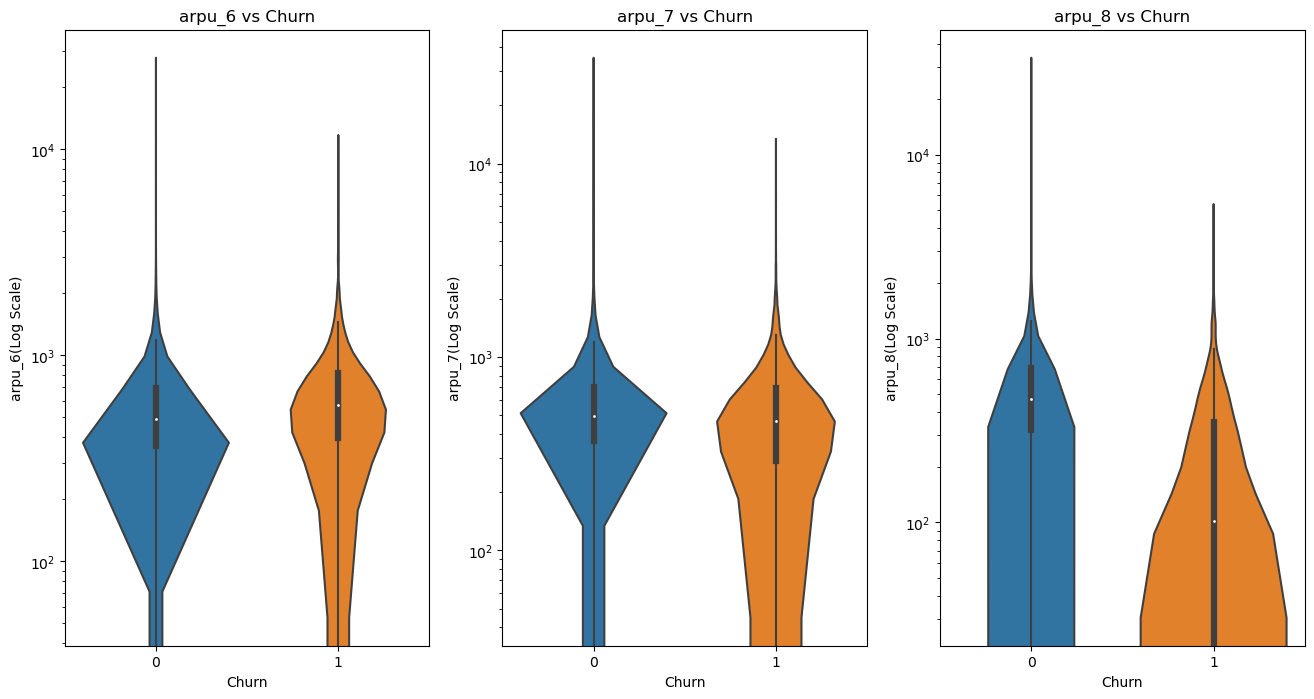

In [464]:
columns = ['arpu_6','arpu_7','arpu_8']
num_univariate_analysis(columns,'log')

Customers who churned (Churn : 1)
       total_og_mou_6  total_og_mou_7  total_og_mou_8
count     2593.000000     2593.000000     2593.000000
mean       867.961342      677.868909      225.083741
std        852.697688      786.961399      471.672718
min          0.000000        0.000000        0.000000
25%        277.880000      110.090000        0.000000
50%        658.360000      466.910000        0.000000
75%       1209.040000      926.760000      255.810000
max       8488.360000     8285.640000     5206.210000

Customers who did not churn (Churn : 0)
       total_og_mou_6  total_og_mou_7  total_og_mou_8
count    27418.000000    27418.000000    27418.000000
mean       669.554896      712.080684      661.480046
std        636.531612      674.580516      691.079113
min          0.000000        0.000000        0.000000
25%        265.682500      284.500000      227.970000
50%        500.410000      529.935000      470.475000
75%        872.070000      931.197500      866.045000
max    

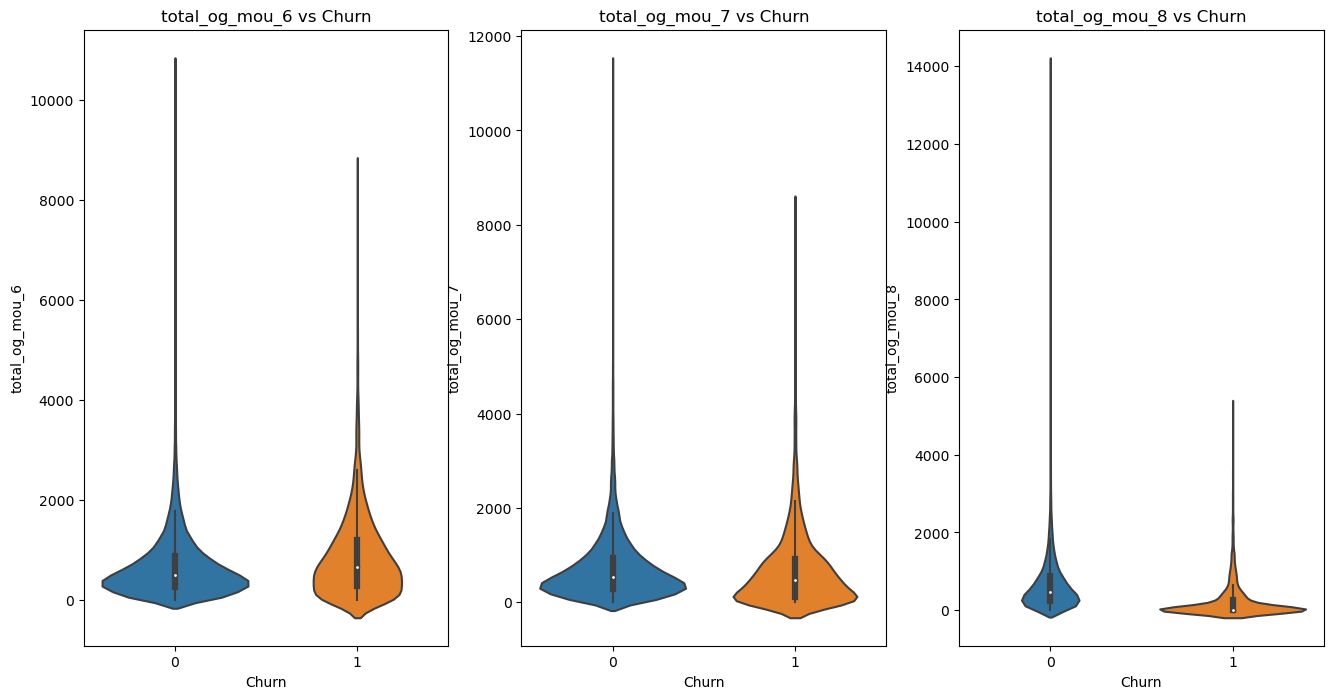

In [465]:
columns = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']
num_univariate_analysis(columns)

Customers who churned (Churn : 1)
       total_ic_mou_6  total_ic_mou_7  total_ic_mou_8
count     2593.000000     2593.000000     2593.000000
mean       241.954404      193.341076       68.807042
std        360.836586      318.183813      154.450340
min          0.000000        0.000000        0.000000
25%         49.460000       27.890000        0.000000
50%        137.330000       99.980000        0.000000
75%        289.510000      235.740000       70.290000
max       6633.180000     5137.560000     1859.280000

Customers who did not churn (Churn : 0)
       total_ic_mou_6  total_ic_mou_7  total_ic_mou_8
count    27418.000000    27418.000000    27418.000000
mean       313.712052      326.369333      316.858595
std        360.580253      372.112086      366.818717
min          0.000000        0.000000        0.000000
25%         94.460000      107.802500       98.265000
50%        212.160000      222.290000      212.360000
75%        401.602500      410.182500      402.270000
max    

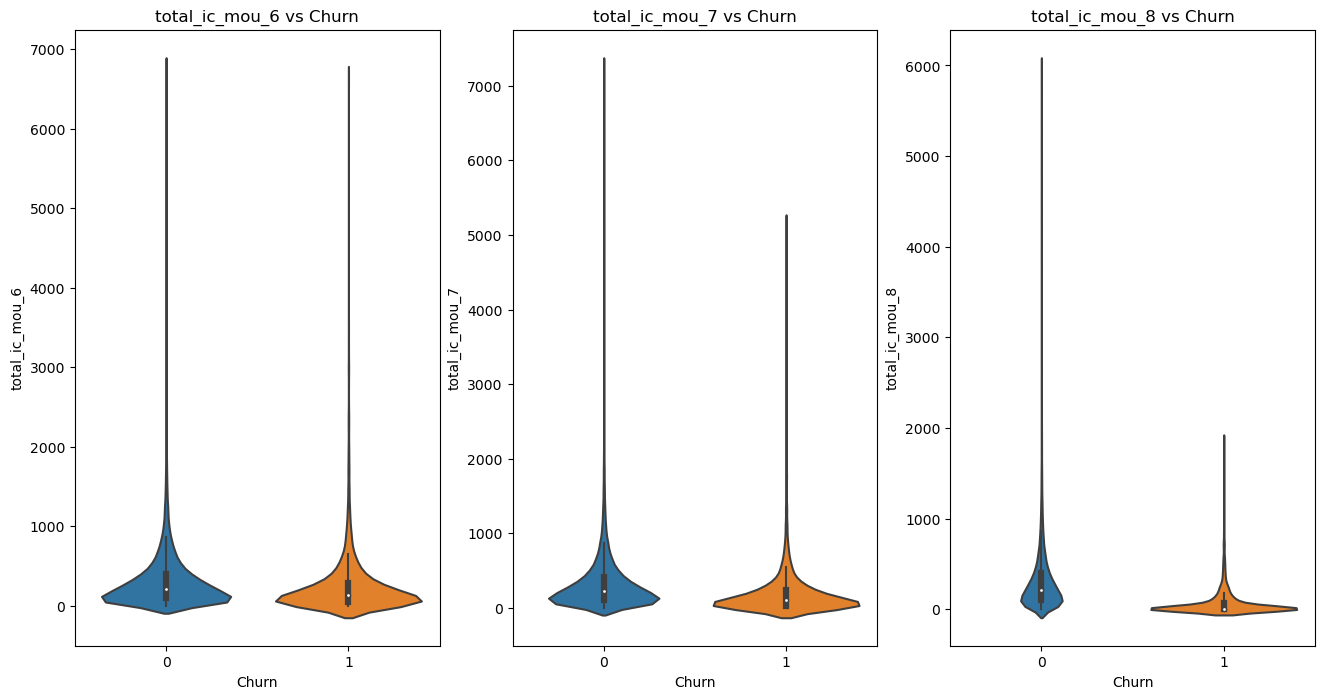

In [466]:
columns = ['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']
num_univariate_analysis(columns)

Customers who churned (Churn : 1)
       vol_2g_mb_6  vol_2g_mb_7  vol_2g_mb_8
count  2593.000000  2593.000000  2593.000000
mean     60.775588    49.054393    15.283185
std     243.084276   219.485813   120.975111
min       0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000
50%       0.000000     0.000000     0.000000
75%       0.000000     0.000000     0.000000
max    4017.160000  3430.730000  3349.190000

Customers who did not churn (Churn : 0)
        vol_2g_mb_6   vol_2g_mb_7   vol_2g_mb_8
count  27418.000000  27418.000000  27418.000000
mean      80.569210     80.925060     74.309036
std      280.420463    285.265125    277.889339
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000
75%       16.937500     18.267500     14.245000
max    10285.900000   7873.550000  11117.610000 



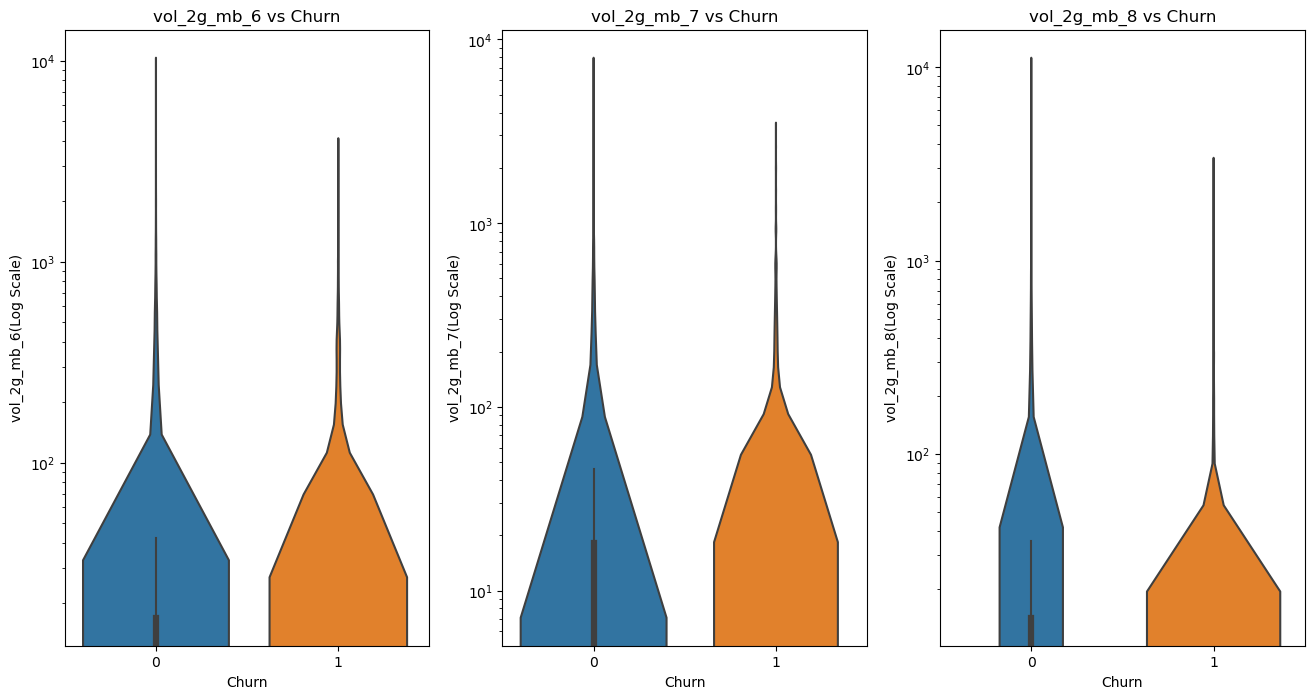

In [467]:
columns = ['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8']
num_univariate_analysis(columns, 'log')

Customers who churned (Churn : 1)
       vol_3g_mb_6   vol_3g_mb_7   vol_3g_mb_8  monthly_3g_6
count  2593.000000   2593.000000   2593.000000   2593.000000
mean    188.395461    157.714254     56.776880      0.134593
std     715.327843    690.773561    446.532769      0.495359
min       0.000000      0.000000      0.000000      0.000000
25%       0.000000      0.000000      0.000000      0.000000
50%       0.000000      0.000000      0.000000      0.000000
75%       0.000000      0.000000      0.000000      0.000000
max    9400.120000  15115.510000  13440.720000      6.000000

Customers who did not churn (Churn : 0)
        vol_3g_mb_6   vol_3g_mb_7   vol_3g_mb_8  monthly_3g_6
count  27418.000000  27418.000000  27418.000000  27418.000000
mean     265.012522    289.478375    290.016390      0.177621
std      878.846885    868.808831    885.821105      0.581065
min        0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000
50% 

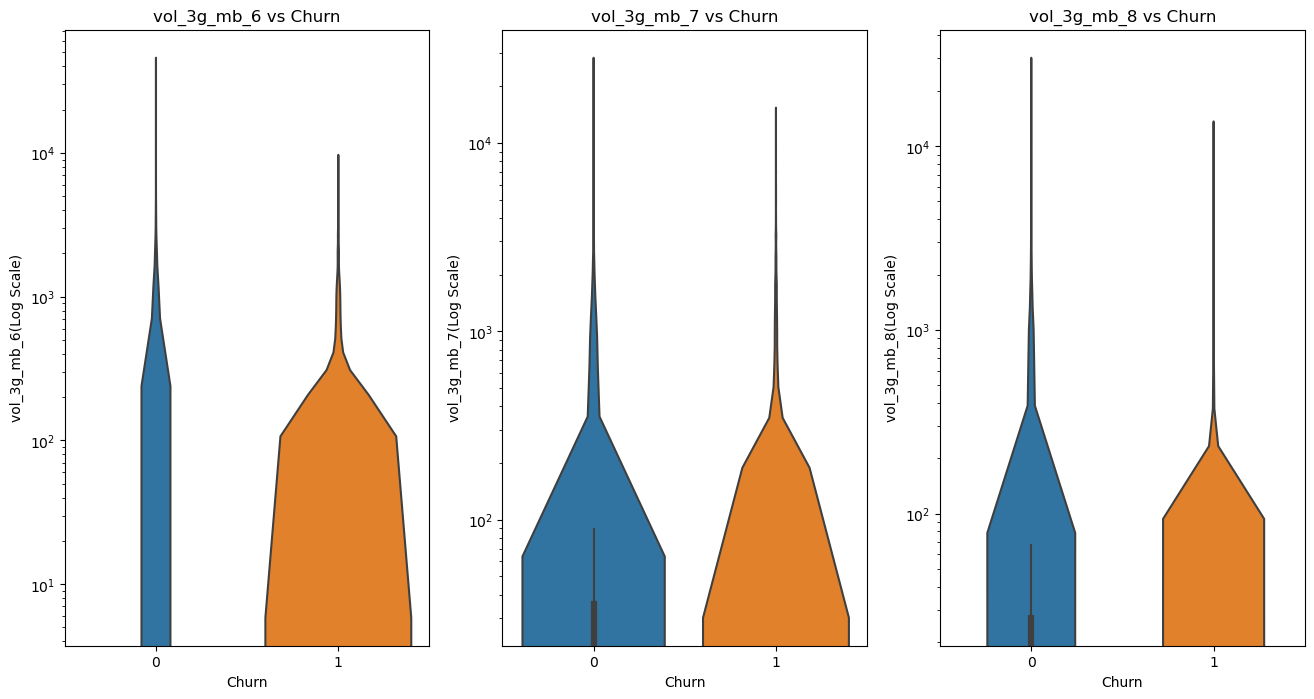

In [468]:
columns = ['vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_3g_6']
num_univariate_analysis(columns, 'log')

Customers who churned (Churn : 1)
+----+----------------+---------+------------+--------------------+----------------------+
|    |   monthly_2g_6 |   count |    percent |   cumulative_count |   cumulative_percent |
|----+----------------+---------+------------+--------------------+----------------------|
|  0 |              0 |    2454 | 94.6394    |               2454 |              94.6394 |
|  1 |              1 |     126 |  4.85924   |               2580 |              99.4987 |
|  2 |              2 |      11 |  0.424219  |               2591 |              99.9229 |
|  3 |              4 |       2 |  0.0771307 |               2593 |             100      |
+----+----------------+---------+------------+--------------------+----------------------+ 

+----+----------------+---------+-----------+--------------------+----------------------+
|    |   monthly_2g_7 |   count |   percent |   cumulative_count |   cumulative_percent |
|----+----------------+---------+-----------+-----------

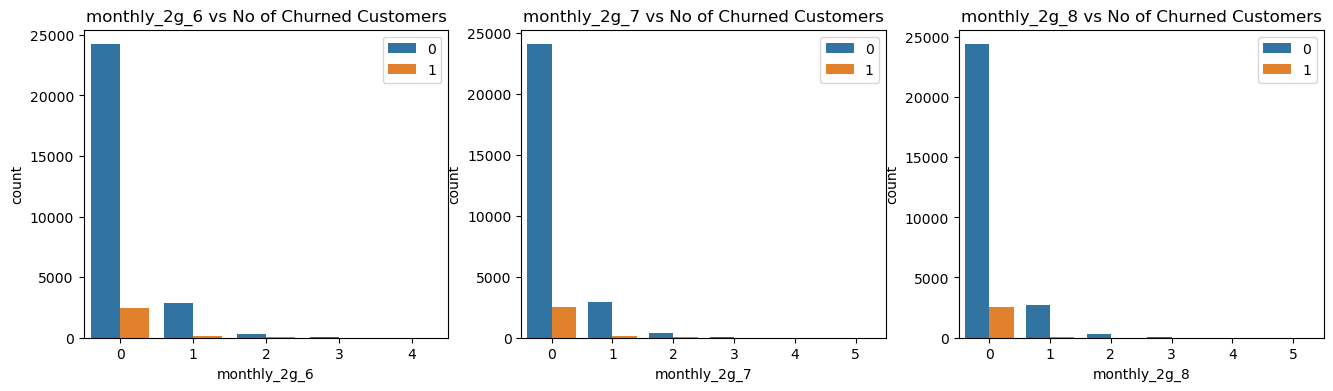

In [469]:
columns = ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8']
cat_univariate_analysis(columns)

Customers who churned (Churn : 1)
+----+----------------+---------+------------+--------------------+----------------------+
|    |   monthly_3g_6 |   count |    percent |   cumulative_count |   cumulative_percent |
|----+----------------+---------+------------+--------------------+----------------------|
|  0 |              0 |    2352 | 90.7057    |               2352 |              90.7057 |
|  1 |              1 |     170 |  6.55611   |               2522 |              97.2619 |
|  2 |              2 |      49 |  1.8897    |               2571 |              99.1516 |
|  3 |              3 |      13 |  0.50135   |               2584 |              99.6529 |
|  4 |              5 |       4 |  0.154261  |               2588 |              99.8072 |
|  5 |              4 |       4 |  0.154261  |               2592 |              99.9614 |
|  6 |              6 |       1 |  0.0385654 |               2593 |             100      |
+----+----------------+---------+------------+----------

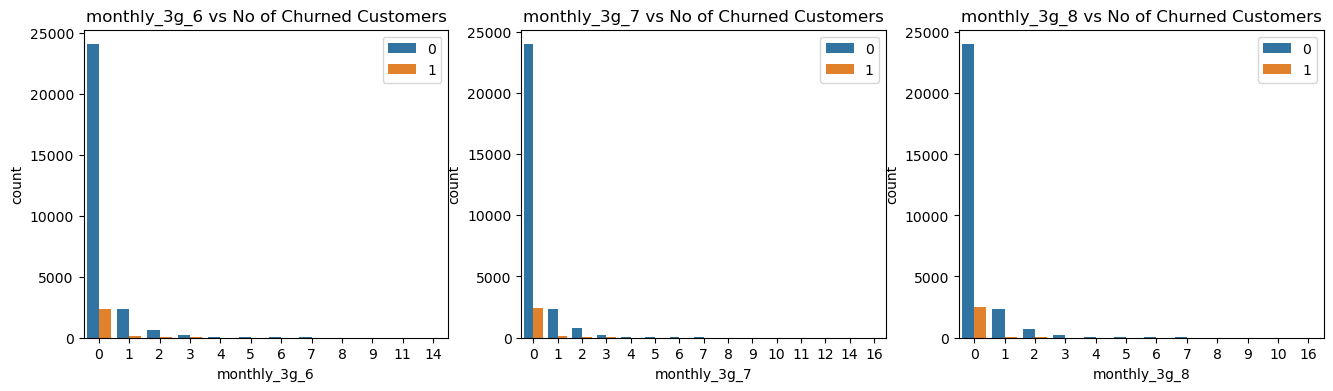

In [470]:
columns = ['monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8']
cat_univariate_analysis(columns)

sachet_3g_6    category
sachet_3g_7    category
sachet_3g_8    category
dtype: object
Customers who churned (Churn : 1)
+----+---------------+---------+------------+--------------------+----------------------+
|    |   sachet_3g_6 |   count |    percent |   cumulative_count |   cumulative_percent |
|----+---------------+---------+------------+--------------------+----------------------|
|  0 |             0 |    2454 | 94.6394    |               2454 |              94.6394 |
|  1 |             1 |      87 |  3.35519   |               2541 |              97.9946 |
|  2 |             2 |      16 |  0.617046  |               2557 |              98.6116 |
|  3 |             4 |      11 |  0.424219  |               2568 |              99.0359 |
|  4 |             3 |       8 |  0.308523  |               2576 |              99.3444 |
|  5 |            10 |       4 |  0.154261  |               2580 |              99.4987 |
|  6 |             7 |       4 |  0.154261  |               2584 |    

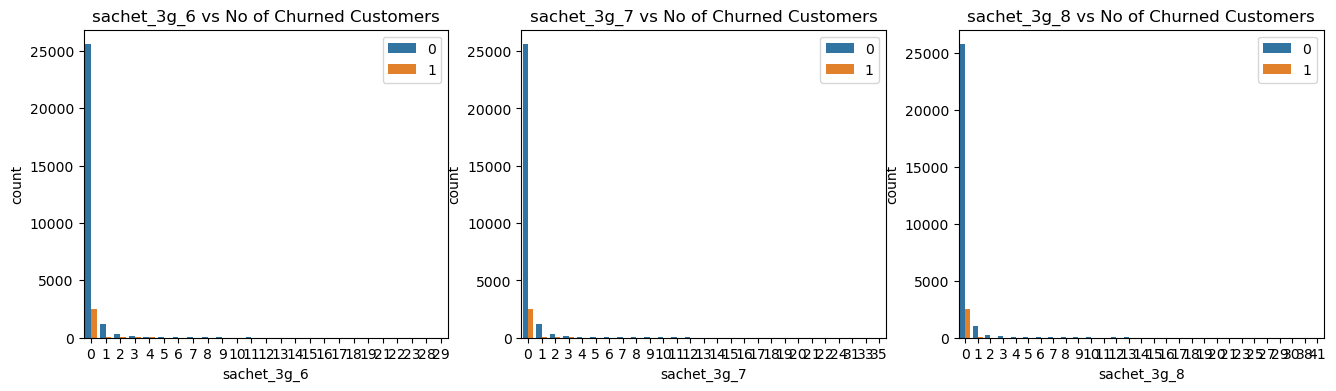

In [471]:
columns = ['sachet_3g_6', 'sachet_3g_7','sachet_3g_8']
print(data[columns].dtypes)
cat_univariate_analysis(columns)

Customers who churned (Churn : 1)
          vbc_3g_6     vbc_3g_7     vbc_3g_8
count  2593.000000  2593.000000  2593.000000
mean     81.564601    71.143880    32.610659
std     320.898511   284.882601   197.998246
min       0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000
50%       0.000000     0.000000     0.000000
75%       0.000000     0.000000     0.000000
max    6931.810000  4908.270000  5738.740000

Customers who did not churn (Churn : 0)
           vbc_3g_6      vbc_3g_7      vbc_3g_8
count  27418.000000  27418.000000  27418.000000
mean     125.124167    141.178182    138.597023
std      395.413666    417.292310    402.761779
min        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000
75%        0.000000      9.940000     17.675000
max    11166.210000   9165.600000  12916.220000 



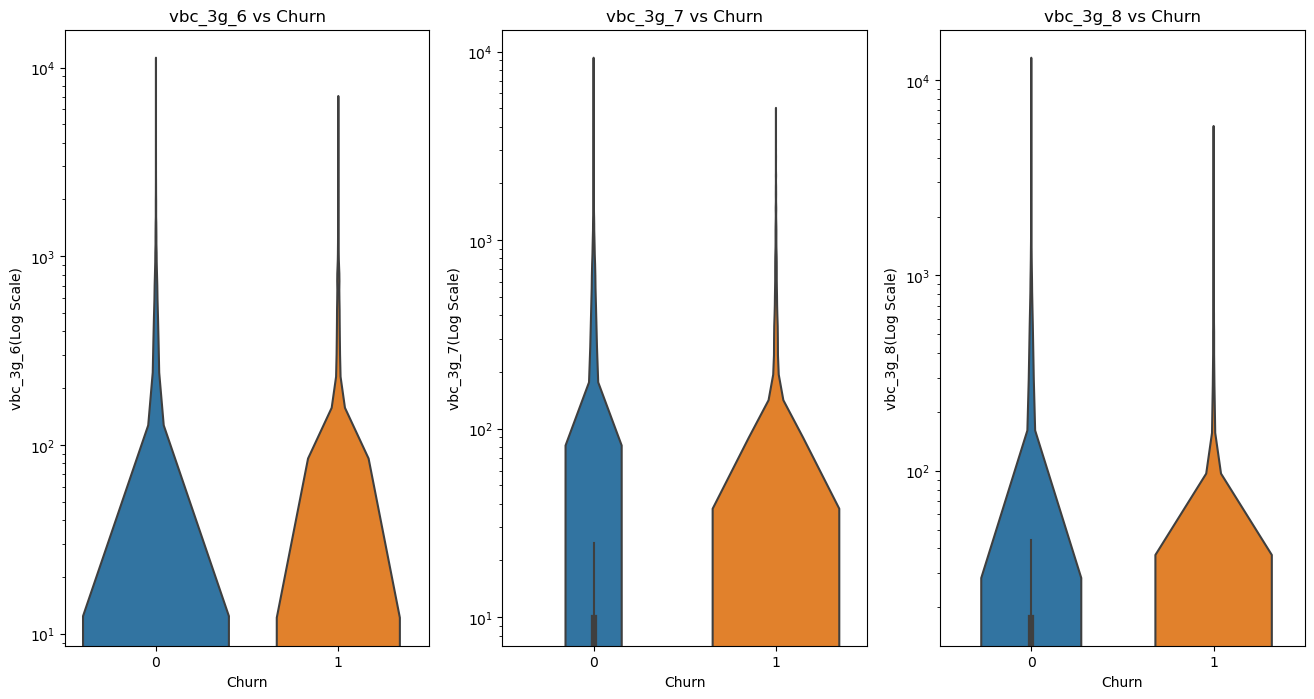

In [472]:
columns = [ 'vbc_3g_6', 'vbc_3g_7','vbc_3g_8']
num_univariate_analysis(columns, 'log')

In [473]:
data.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,...,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,Average_rech_amt_6n7,Churn
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,...,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1185.0,1
7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,...,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0
7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,...,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0
7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.00,0.00,0.00,30.89,...,0.23,0.00,0.00,0.00,10,6,2,570,348,160,110,110,130,100,100,130,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,459.0,0
7000187447,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,4.76,4.81,0.00,8.46,13.34,38.99,0.00,0.00,58.54,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,97.54,0.00,0.00,1146.91,0.81,0.00,1.55,0.00,0.00,0.00,0.00,0.00,1148.46,...,0.00,0.00,0.00,0.00,19,2,4,816,0,30,110,0,30,30,0,0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,667,0.00,0.00,0.00,408.0,0


<Axes: xlabel='total_og_mou_6', ylabel='total_og_mou_8'>

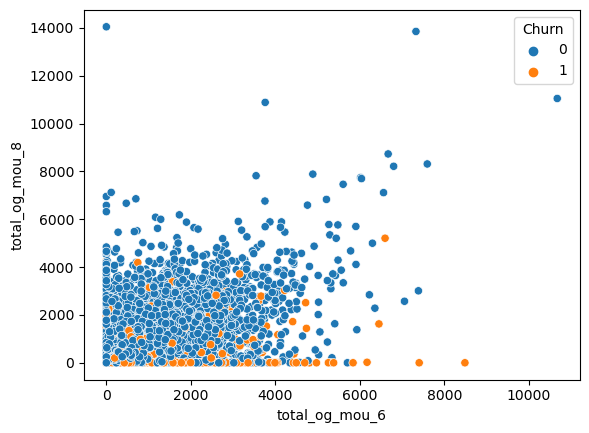

In [474]:
sns.scatterplot(x=data['total_og_mou_6'],y=data['total_og_mou_8'],hue=data['Churn'])

<Axes: xlabel='total_og_mou_6', ylabel='total_og_mou_8'>

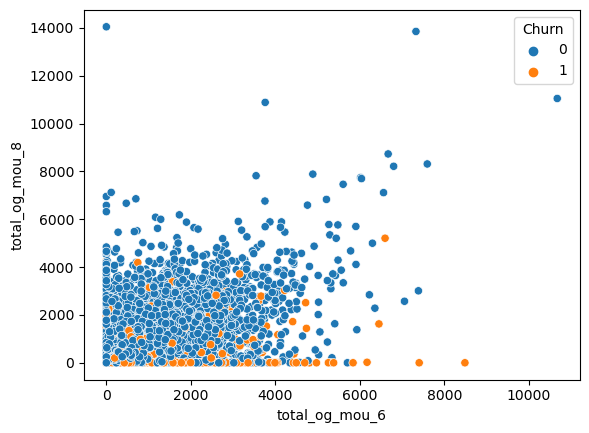

In [475]:
sns.scatterplot(x=data['total_og_mou_6'],y=data['total_og_mou_8'],hue=data['Churn'])

<Axes: xlabel='aon', ylabel='total_og_mou_8'>

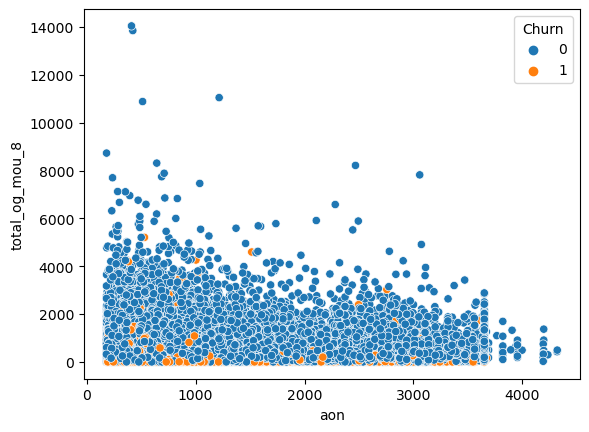

In [476]:
sns.scatterplot(x=data['aon'],y=data['total_og_mou_8'],hue=data['Churn'])

<Axes: xlabel='aon', ylabel='total_ic_mou_8'>

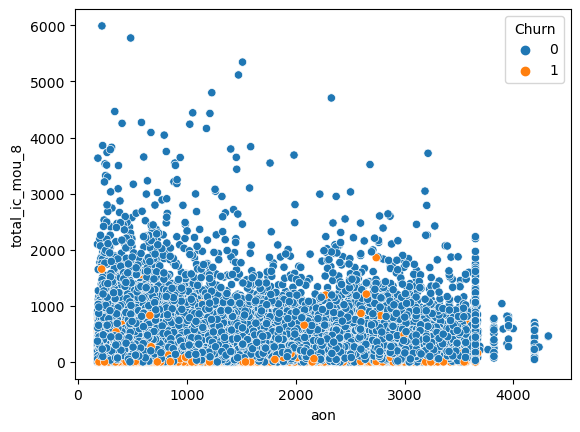

In [477]:
sns.scatterplot(x=data['aon'],y=data['total_ic_mou_8'],hue=data['Churn'])

<Axes: xlabel='max_rech_amt_6', ylabel='max_rech_amt_8'>

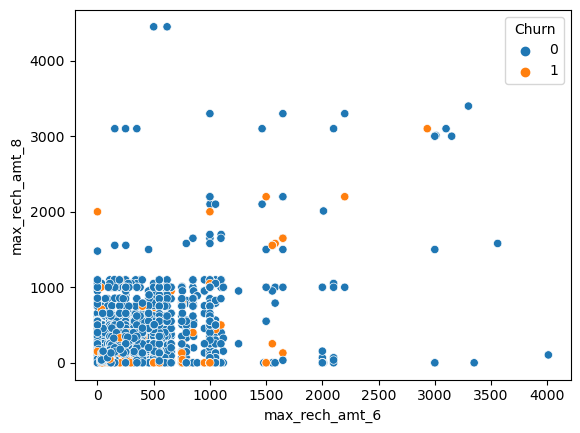

In [478]:
sns.scatterplot(x=data['max_rech_amt_6'],y=data['max_rech_amt_8'],hue=data['Churn'])

In [479]:
def correlation(dataframe) : 
    
    columnsForAnalysis = set(dataframe.columns.values) - {'Churn'}
    cor0=dataframe[columnsForAnalysis].corr()
    type(cor0)
    cor0.where(np.triu(np.ones(cor0.shape),k=1).astype(np.bool))
    cor0=cor0.unstack().reset_index()
    cor0.columns=['VAR1','VAR2','CORR']
    cor0.dropna(subset=['CORR'], inplace=True)
    cor0.CORR=round(cor0['CORR'],2)
    cor0.CORR=cor0.CORR.abs()
    cor0.sort_values(by=['CORR'],ascending=False)
    cor0=cor0[~(cor0['VAR1']==cor0['VAR2'])]

    # removing duplicate correlations
    cor0['pair'] = cor0[['VAR1', 'VAR2']].apply(lambda x: '{}-{}'.format(*sorted((x[0], x[1]))), axis=1)
    
    cor0 = cor0.drop_duplicates(subset=['pair'], keep='first')
    cor0 = cor0[['VAR1', 'VAR2','CORR']]
    return pd.DataFrame(cor0.sort_values(by=['CORR'],ascending=False))

In [480]:
#pd.set_option('precision', 2)
cor_0 = correlation(non_churned_customers)

# filtering for correlations >= 40%
condition = cor_0['CORR'] > 0.4
cor_0 = cor_0[condition]
cor_0.style.background_gradient(cmap='GnBu').hide_index()

VAR1,VAR2,CORR
isd_og_mou_7,isd_og_mou_8,0.960000
isd_og_mou_6,isd_og_mou_7,0.950000
isd_og_mou_6,isd_og_mou_8,0.950000
arpu_8,total_rech_amt_8,0.950000
total_rech_amt_6,arpu_6,0.940000
arpu_7,total_rech_amt_7,0.940000
Average_rech_amt_6n7,total_rech_amt_7,0.910000
Average_rech_amt_6n7,arpu_7,0.910000
total_ic_mou_6,loc_ic_mou_6,0.900000
Average_rech_amt_6n7,total_rech_amt_6,0.900000


In [481]:
# Correlations for Churn : 0  - non churn customers
# Absolute values are reported 
#pd.set_option('precision', 2)
cor_0 = correlation(non_churned_customers)

# filtering for correlations >= 40%
condition = cor_0['CORR'] > 0.4
cor_0 = cor_0[condition]
cor_0.style.background_gradient(cmap='GnBu').hide_index()

VAR1,VAR2,CORR
isd_og_mou_7,isd_og_mou_8,0.960000
isd_og_mou_6,isd_og_mou_7,0.950000
isd_og_mou_6,isd_og_mou_8,0.950000
arpu_8,total_rech_amt_8,0.950000
total_rech_amt_6,arpu_6,0.940000
arpu_7,total_rech_amt_7,0.940000
Average_rech_amt_6n7,total_rech_amt_7,0.910000
Average_rech_amt_6n7,arpu_7,0.910000
total_ic_mou_6,loc_ic_mou_6,0.900000
Average_rech_amt_6n7,total_rech_amt_6,0.900000


# Data Preparation 

In [482]:
data['delta_vol_2g'] = data['vol_2g_mb_6'].add(data['vol_2g_mb_7']).div(2)
data['delta_vol_3g'] = data['vol_3g_mb_6'].add(data['vol_3g_mb_7']).div(2)
data['delta_total_og_mou'] = data['total_og_mou_8'] - data['total_og_mou_6'].add(data['total_og_mou_7']).div(2)
data['delta_total_ic_mou'] = data['total_ic_mou_8'] - data['total_ic_mou_6'].add(data['total_ic_mou_7']).div(2)
data['delta_vbc_3g'] = data['vbc_3g_8'] - data['vbc_3g_6'].add(data['vbc_3g_7']).div(2)

# Revenue 
data['delta_arpu'] = data['arpu_8'] - data['arpu_6'].add(data['arpu_7']).div(2)
data['delta_total_rech_amt'] = data['total_rech_amt_8'] - data['total_rech_amt_6'].add(data['total_rech_amt_7']).div(2)

In [483]:
data.drop(columns=[
 'vol_2g_mb_8', 'vol_2g_mb_6', 'vol_2g_mb_7',
  'vol_3g_mb_8'  , 'vol_3g_mb_6', 'vol_3g_mb_7' ,
    'total_og_mou_8','total_og_mou_6', 'total_og_mou_7', 
    'total_ic_mou_8','total_ic_mou_6', 'total_ic_mou_7',
    'vbc_3g_8','vbc_3g_6','vbc_3g_7',
    'arpu_8','arpu_6','arpu_7',
    'total_rech_amt_8', 'total_rech_amt_6', 'total_rech_amt_7'
    
], inplace=True)

In [484]:
data.quantile(np.arange(0.9,1.01,0.01)).pct_change().mul(100).style.bar()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,Average_rech_amt_6n7,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_vbc_3g,delta_arpu,delta_total_rech_amt
0.900000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
0.910000,6.790988,6.546981,8.274899,5.587715,5.165172,5.328711,21.271005,26.802832,25.224839,21.636166,21.388350,25.127998,8.672630,8.195246,8.593266,5.959877,5.559441,6.042337,10.342764,10.825295,11.084906,15.841584,13.884298,14.876404,6.252002,5.367976,5.730413,8.837803,8.896338,9.656996,8.944591,7.723881,9.818921,32.272727,28.440367,31.791908,4.792581,5.709917,6.430213,nan,nan,nan,10.106717,9.087647,9.157428,12.389381,nan,nan,7.045455,7.293915,7.896584,5.995550,6.191913,6.007378,11.113943,10.604288,10.814735,6.052961,5.483998,5.592135,10.025914,10.835879,11.792159,9.582993,8.835016,10.151648,19.495413,19.890830,19.543147,8.688638,8.956683,9.097619,7.142857,nan,nan,22.191872,19.349727,22.837573,24.137931,22.012579,22.764228,4.347826,4.347826,4.761905,9.427609,10.000000,14.682540,0.000000,0.000000,11.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.252284,3.398927,15.625305,10.193367,9.386646,9.844535,36.510096,8.391023,8.307210
0.920000,7.077660,7.245159,8.356988,6.687424,5.494807,6.012325,22.719944,27.485933,26.727086,19.338017,21.902743,24.031442,9.727699,8.852552,8.651225,6.405405,5.678501,6.109507,11.237118,11.914894,11.093418,16.452991,13.570392,14.710485,5.666807,6.211634,6.262684,9.334285,8.790706,9.318983,8.355405,9.372247,9.794249,28.522337,32.500000,32.017544,6.124071,5.680185,6.755143,inf,inf,nan,9.806157,9.918714,10.603291,12.598425,nan,nan,8.679550,8.010926,8.604963,6.464330,6.436897,6.219535,11.603579,11.614381,12.079006,6.154269,5.887441,5.841336,11.828745,11.700742,11.299750,9.767199,10.348952,10.460406,21.497121,20.378802,22.123142,9.794334,9.954520,10.412720,10.000000,nan,inf,23.123058,23.346001,25.197812,23.611111,22.680412,23.178808,4.166667,4.166667,4.545455,7.692308,6.060606,14.186851,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.443215,3.979239,15.881978,8.556369,11.261178,9.607481,33.756098,8.823437,8.538350
0.930000,8.957224,7.872164,8.480572,6.144814,6.342032,6.712302,24.032026,25.616577

In [485]:
pct_change_99_1 = data.quantile(np.arange(0.9,1.01,0.01)).pct_change().mul(100).iloc[-1]
outlier_condition = pct_change_99_1 > 100
columns_with_outliers = pct_change_99_1[outlier_condition].index.values
print('Columns with outliers :\n', columns_with_outliers)

Columns with outliers :
 ['onnet_mou_6' 'onnet_mou_7' 'onnet_mou_8' 'offnet_mou_6' 'offnet_mou_7'
 'offnet_mou_8' 'roam_ic_mou_6' 'roam_ic_mou_7' 'roam_ic_mou_8'
 'roam_og_mou_6' 'roam_og_mou_7' 'roam_og_mou_8' 'loc_og_t2t_mou_6'
 'loc_og_t2t_mou_7' 'loc_og_t2t_mou_8' 'loc_og_t2m_mou_6'
 'loc_og_t2m_mou_7' 'loc_og_t2m_mou_8' 'loc_og_t2f_mou_6'
 'loc_og_t2f_mou_7' 'loc_og_t2f_mou_8' 'loc_og_t2c_mou_6'
 'loc_og_t2c_mou_7' 'loc_og_t2c_mou_8' 'loc_og_mou_6' 'loc_og_mou_7'
 'loc_og_mou_8' 'std_og_t2t_mou_6' 'std_og_t2t_mou_7' 'std_og_t2t_mou_8'
 'std_og_t2m_mou_6' 'std_og_t2m_mou_7' 'std_og_t2m_mou_8'
 'std_og_t2f_mou_6' 'std_og_t2f_mou_7' 'std_og_t2f_mou_8' 'std_og_mou_6'
 'std_og_mou_7' 'std_og_mou_8' 'isd_og_mou_6' 'isd_og_mou_7'
 'isd_og_mou_8' 'spl_og_mou_6' 'spl_og_mou_7' 'spl_og_mou_8' 'og_others_6'
 'og_others_7' 'og_others_8' 'loc_ic_t2t_mou_6' 'loc_ic_t2t_mou_7'
 'loc_ic_t2t_mou_8' 'loc_ic_t2m_mou_6' 'loc_ic_t2m_mou_7'
 'loc_ic_t2m_mou_8' 'loc_ic_t2f_mou_6' 'loc_ic_t2f_mou_7'
 'lo

 # Outliers 

In [486]:
outlier_treatment = pd.DataFrame(columns=['Column', 'Outlier Threshold', 'Outliers replaced'])
for col in columns_with_outliers : 
    outlier_threshold = data[col].quantile(0.99)
    condition = data[col] > outlier_threshold
    outlier_treatment = outlier_treatment.append({'Column' : col , 'Outlier Threshold' : outlier_threshold, 'Outliers replaced' : data.loc[condition,col].shape[0] }, ignore_index=True)
    data.loc[condition, col] = outlier_threshold
outlier_treatment

,Column,Outlier Threshold,Outliers replaced
0,onnet_mou_6,2166.37000,301
1,onnet_mou_7,2220.36700,301
2,onnet_mou_8,2188.50400,301
3,offnet_mou_6,2326.29000,301
4,offnet_mou_7,2410.10400,301
...,...,...,...
98,delta_total_og_mou,1465.10300,301
99,delta_total_ic_mou,619.69100,301
100,delta_vbc_3g,929.64400,301
101,delta_arpu,864.34085,301


In [487]:
categorical = data.dtypes == 'category'
categorical_vars = data.columns[categorical].to_list()
ind_categorical_vars = set(categorical_vars) - {'Churn'} #independent categorical variables
ind_categorical_vars

{'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8'}

In [488]:
data['Churn']

mobile_number
7000701601    1
7001524846    0
7002191713    0
7000875565    0
7000187447    0
             ..
7001386760    0
7001453306    0
7001729035    0
7002111859    0
7000498689    0
Name: Churn, Length: 30011, dtype: category
Categories (2, int64): [0, 1]

# Grouping Categories

In [489]:
for col in ind_categorical_vars : 
    category_counts = 100*data[col].value_counts(normalize=True)
    print('\n',tabulate(pd.DataFrame(category_counts), headers='keys', tablefmt='psql'),'\n')
    low_count_categories = category_counts[category_counts <= 1].index.to_list()
    print(f"Replaced {low_count_categories} in {col} with category : Others")
    data[col].replace(low_count_categories,'Others',inplace=True)


 +----+---------------+
|    |   sachet_2g_6 |
|----+---------------|
|  0 |   82.5631     |
|  1 |    7.87378    |
|  2 |    3.3621     |
|  3 |    2.0126     |
|  4 |    1.32951    |
|  5 |    0.703076   |
|  6 |    0.509813   |
|  7 |    0.356536   |
|  8 |    0.286562   |
|  9 |    0.239912   |
| 10 |    0.17327    |
| 12 |    0.146613   |
| 11 |    0.0999633  |
| 13 |    0.0566459  |
| 14 |    0.0533138  |
| 15 |    0.0433175  |
| 17 |    0.0366532  |
| 19 |    0.029989   |
| 18 |    0.029989   |
| 16 |    0.0233248  |
| 22 |    0.0133284  |
| 20 |    0.00999633 |
| 21 |    0.00999633 |
| 24 |    0.00999633 |
| 25 |    0.00999633 |
| 27 |    0.00333211 |
| 30 |    0.00333211 |
| 32 |    0.00333211 |
| 34 |    0.00333211 |
| 39 |    0.00333211 |
| 28 |    0          |
| 42 |    0          |
+----+---------------+ 

Replaced [5, 6, 7, 8, 9, 10, 12, 11, 13, 14, 15, 17, 19, 18, 16, 22, 20, 21, 24, 25, 27, 30, 32, 34, 39, 28, 42] in sachet_2g_6 with category : Others

 +----+---------

In [490]:
dummy_vars = pd.get_dummies(data[ind_categorical_vars], drop_first=False, prefix=ind_categorical_vars, prefix_sep='_')
dummy_vars.head()

,sachet_2g_6_0,sachet_2g_6_1,sachet_2g_6_2,sachet_2g_6_3,sachet_2g_6_4,sachet_2g_6_Others,sachet_3g_8_0,sachet_3g_8_1,sachet_3g_8_Others,sachet_2g_7_0,sachet_2g_7_1,sachet_2g_7_2,sachet_2g_7_3,sachet_2g_7_4,sachet_2g_7_5,sachet_2g_7_Others,sachet_3g_7_0,sachet_3g_7_1,sachet_3g_7_2,sachet_3g_7_Others,sachet_3g_6_0,sachet_3g_6_1,sachet_3g_6_2,sachet_3g_6_Others,sachet_2g_8_0,sachet_2g_8_1,sachet_2g_8_2,sachet_2g_8_3,sachet_2g_8_4,sachet_2g_8_5,sachet_2g_8_Others
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
7001524846,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
7002191713,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
7000875565,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
7000187447,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [491]:
reference_cols = dummy_vars.filter(regex='.*Others$').columns.to_list() # Using category 'Others' in each column as reference. 
dummy_vars.drop(columns=reference_cols, inplace=True)
reference_cols

['sachet_2g_6_Others',
 'sachet_3g_8_Others',
 'sachet_2g_7_Others',
 'sachet_3g_7_Others',
 'sachet_3g_6_Others',
 'sachet_2g_8_Others']

In [492]:
data.drop(columns=ind_categorical_vars, inplace=True) # dropping original categorical columns
data = pd.concat([data, dummy_vars], axis=1)
data.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,...,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,Average_rech_amt_6n7,Churn,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_vbc_3g,delta_arpu,delta_total_rech_amt,sachet_2g_6_0,sachet_2g_6_1,sachet_2g_6_2,sachet_2g_6_3,sachet_2g_6_4,sachet_3g_8_0,sachet_3g_8_1,sachet_2g_7_0,sachet_2g_7_1,sachet_2g_7_2,sachet_2g_7_3,sachet_2g_7_4,sachet_2g_7_5,sachet_3g_7_0,sachet_3g_7_1,sachet_3g_7_2,sachet_3g_6_0,sachet_3g_6_1,sachet_3g_6_2,sachet_2g_8_0,sachet_2g_8_1,sachet_2g_8_2,sachet_2g_8_3,sachet_2g_8_4,sachet_2g_8_5
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,...,0,0,0,0,0,802,1185.0,1,0.0,0.000,-198.225,-163.510,38.680,864.34085,1036.4,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
7001524846,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,...,1,0,0,0,0,315,519.0,0,178.0,375.475,-298.450,-49.635,-495.375,-298.11000,-399.0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
7002191713,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,...,0,0,0,0,0,2607,380.0,0,0.0,0.000,465.510,573.935,0.000,244.00150,337.0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
7000875565,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.00,0.00,0.00,30.89,67.09,21.53,0.0,...,0,0,0,0,0,511,459.0,0,0.0,0.000,-83.030,-78.750,-12.170,-177.52800,-299.0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
7000187447,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,4.76,4.81,0.00,8.46,13.34,38.99,0.00,0.00,58.54,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,97.54,0.00,0.00,1146.91,0.81,0.00,1.55,0.00,0.00,0.00,0.00,0.00,1148.46,0.81,0.00,0.0,...,0,0,0,0,0,667,408.0,0,0.0,0.000,-625.170,-47.095,0.000,-328.99500,-378.0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0


In [493]:
dummy_cols = dummy_vars.columns.to_list()
data[dummy_cols] = data[dummy_cols].astype('category')

In [494]:
data.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,...,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,Average_rech_amt_6n7,Churn,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_vbc_3g,delta_arpu,delta_total_rech_amt,sachet_2g_6_0,sachet_2g_6_1,sachet_2g_6_2,sachet_2g_6_3,sachet_2g_6_4,sachet_3g_8_0,sachet_3g_8_1,sachet_2g_7_0,sachet_2g_7_1,sachet_2g_7_2,sachet_2g_7_3,sachet_2g_7_4,sachet_2g_7_5,sachet_3g_7_0,sachet_3g_7_1,sachet_3g_7_2,sachet_3g_6_0,sachet_3g_6_1,sachet_3g_6_2,sachet_2g_8_0,sachet_2g_8_1,sachet_2g_8_2,sachet_2g_8_3,sachet_2g_8_4,sachet_2g_8_5
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,...,0,0,0,0,0,802,1185.0,1,0.0,0.000,-198.225,-163.510,38.680,864.34085,1036.4,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
7001524846,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,...,1,0,0,0,0,315,519.0,0,178.0,375.475,-298.450,-49.635,-495.375,-298.11000,-399.0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
7002191713,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,...,0,0,0,0,0,2607,380.0,0,0.0,0.000,465.510,573.935,0.000,244.00150,337.0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
7000875565,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.00,0.00,0.00,30.89,67.09,21.53,0.0,...,0,0,0,0,0,511,459.0,0,0.0,0.000,-83.030,-78.750,-12.170,-177.52800,-299.0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
7000187447,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,4.76,4.81,0.00,8.46,13.34,38.99,0.00,0.00,58.54,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,97.54,0.00,0.00,1146.91,0.81,0.00,1.55,0.00,0.00,0.00,0.00,0.00,1148.46,0.81,0.00,0.0,...,0,0,0,0,0,667,408.0,0,0.0,0.000,-625.170,-47.095,0.000,-328.99500,-378.0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0


In [495]:
data.shape

(30011, 131)

In [496]:
data.columns

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6',
       ...
       'sachet_3g_7_2', 'sachet_3g_6_0', 'sachet_3g_6_1', 'sachet_3g_6_2',
       'sachet_2g_8_0', 'sachet_2g_8_1', 'sachet_2g_8_2', 'sachet_2g_8_3',
       'sachet_2g_8_4', 'sachet_2g_8_5'],
      dtype='object', length=131)

In [497]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [ ]:
data.info

In [ ]:
data = data.dropna()

# Train-Test Split

In [ ]:
y = data.pop('Churn') # Predicted / Target Variable
X = data # Predictor variables

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=42)

#  Class Imbalance

In [ ]:
y.value_counts(normalize=True).to_frame()

In [ ]:
class_0 = y[y == 0].count()
class_1 = y[y == 1].count()

print(f'Class Imbalance Ratio : {round(class_1/class_0,3)}')

In [504]:
#!pip install imblearn
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42, k_neighbors=5)

# Resampling Train set to account for class imbalance

X_train_resampled, y_train_resampled= smt.fit_resample(X_train, y_train)
X_train_resampled.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,Average_rech_amt_6n7,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_vbc_3g,delta_arpu,delta_total_rech_amt,sachet_2g_6_0,sachet_2g_6_1,sachet_2g_6_2,sachet_2g_6_3,sachet_2g_6_4,sachet_3g_8_0,sachet_3g_8_1,sachet_2g_7_0,sachet_2g_7_1,sachet_2g_7_2,sachet_2g_7_3,sachet_2g_7_4,sachet_2g_7_5,sachet_3g_7_0,sachet_3g_7_1,sachet_3g_7_2,sachet_3g_6_0,sachet_3g_6_1,sachet_3g_6_2,sachet_2g_8_0,sachet_2g_8_1,sachet_2g_8_2,sachet_2g_8_3,sachet_2g_8_4,sachet_2g_8_5
0,53.01,52.64,37.48,316.01,195.74,68.36,0.0,0.0,0.0,0.0,0.0,0.0,53.01,52.64,37.48,282.38,171.64,44.51,31.59,17.38,19.43,0.0,0.0,0.00,366.99,241.68,101.43,0.00,0.00,0.00,0.00,2.11,0.00,2.03,4.59,4.41,2.03,6.71,4.41,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,18.41,40.79,11.79,292.99,191.98,85.89,6.26,1.21,10.39,317.68,233.99,108.09,0.00,0.00,0.00,0.66,0.00,0.00,5.61,1.53,2.76,6.28,1.53,2.76,0.00,0.0,0.00,0.00,0.00,9.55,0.00,0.00,0.00,6,5,4,198,198,198,110,130,130,1,1,1,0,0,0,1423,483.0,792.31,286.480,-202.870,-159.335,71.085,-172.4995,-155.0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,91.39,216.14,150.58,504.19,301.98,434.41,0.0,0.0,0.0,0.0,0.0,0.0,40.36,36.21,27.73,37.26,36.73,59.61,0.00,0.00,0.00,0.0,0.0,0.58,77.63,72.94,87.34,51.03,179.93,122.84,465.96,265.24,356.44,0.00,0.00,0.00,516.99,445.18,479.29,0.96,0.0,3.89,0.0,0.0,14.45,0.0,0.0,0.0,104.39,31.98,35.83,154.11,147.88,243.53,0.00,0.76,0.00,258.51,180.63,279.36,4.03,2.99,0.46,6.36,12.31,3.91,0.00,0.00,0.00,10.39,15.31,4.38,0.58,0.0,0.25,19.66,21.96,86.63,0.23,0.56,1.04,8,11,12,110,130,130,0,130,0,0,0,0,0,0,0,189,454.0,0.00,0.000,28.130,117.745,0.000,48.6160,-94.0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
2,11.96,14.13,0.40,1.51,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,11.96,14.13,0.40,1.51,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,13.48,14.13,0.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,20.58,20.39,97.66,36.84,21.58,18.66,5.48,0.73,1.43,62.91,42.71,117.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5,3,4,252,252,252,252,0,252,0,0,0,2,1,2,2922,403.0,58.63,1258.175,-13.405,64.950,0.000,75.3940,151.0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
3,532.66,537.31,738.21,49.03,71.64,39.43,0.0,0.0,0.0,0.0,0.0,0.0,24.46,19.79,37.74,41.26,47.86,39.43,1.19,4.04,0.00,0.0,0.0,0.00,66.93,71.71,77.18,508.19,517.51,700.46,6.56,18.24,0.00,0.00,1.48,0.00,514.76,537.24,700.46,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,19.86,28.81,20.24,66.08,94.18,67.54,51.74,68.16,50.08,137.69,191.16,13

In [505]:
condition1 = data.dtypes == 'int'
condition2 = data.dtypes == 'float'
numerical_vars = data.columns[condition1 | condition2].to_list()

In [506]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

# Fit and transform train set 
X_train_resampled[numerical_vars] = scaler.fit_transform(X_train_resampled[numerical_vars])

# Transform test set
X_test[numerical_vars] = scaler.transform(X_test[numerical_vars])

# Train Split

In [507]:
round(X_train_resampled.describe(),2)


,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,aon,Average_rech_amt_6n7,delta_vol_2g,delta_vol_3g,delta_total_og_mou,delta_total_ic_mou,delta_vbc_3g,delta_arpu,delta_total_rech_amt
count,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.0,38374.0,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00,38374.00
mean,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.0,0.0,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,12.66,11.41,7.67,159.68,156.22,119.29,95.27,86.77,62.37,0.07,0.08,0.06,0.12,0.12,0.10,1074.40,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,0.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,8.57,8.48,7.81,148.51,150.61,138.37,102.97,102.86,98.37,0.29,0.29,0.26,0.43,0.43,0.39,887.18,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.73,-0.68,-0.53,-0.94,-0.89,-0.70,-0.31,-0.32,-0.33,-0.33,-0.36,-0.36,-0.50,-0.49,-0.42,-0.75,-0.73,-0.59,-0.38,-0.38,-0.33,-0.37,-0.37,-0.31,-0.76,-0.74,-0.60,-0.57,-0.54,-0.40,-0.60,-0.56,-0.43,-0.22,-0.22,-0.19,-0.79,-0.74,-0.53,-0.19,-0.18,-0.14,-0.51,-0.53,-0.43,-0.44,0.0,0.0,-0.61,-0.57,-0.48,-0.77,-0.75,-0.61,-0.40,-0.39,-0.35,-0.80,-0.77,-

In [508]:
from sklearn.linear_model import LogisticRegression


baseline_model = LogisticRegression(random_state=100, class_weight='balanced') # `weight of class` balancing technique used
baseline_model = baseline_model.fit(X_train, y_train)

y_train_pred = baseline_model.predict_proba(X_train)[:,1]
y_test_pred  = baseline_model.predict_proba(X_test)[:,1]

In [509]:
y_train_pred = pd.Series(y_train_pred,index = X_train.index, ) # converting test and train to a series to preserve index
y_test_pred = pd.Series(y_test_pred,index = X_test.index)

In [510]:
import math
def model_metrics(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    print('Accuracy :' ,accuracy )
    sensitivity = round(TP/float(FN + TP),3)
    print('Sensitivity / True Positive Rate / Recall :', sensitivity)
    specificity = round(TN/float(TN + FP),3)
    print('Specificity / True Negative Rate : ', specificity)
    precision = round(TP/float(TP + FP),3)
    print('Precision / Positive Predictive Value :', precision)
    print('F1-score :', round(2*precision*sensitivity/(precision + sensitivity),3))

In [511]:
classification_threshold = 0.5 
    
y_train_pred_classified = y_train_pred.map(lambda x : 1 if x > classification_threshold else 0)
y_test_pred_classified = y_test_pred.map(lambda x : 1 if x > classification_threshold else 0)

In [512]:
from sklearn.metrics import confusion_matrix
train_matrix = confusion_matrix(y_train, y_train_pred_classified)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_classified)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[16022  3165]
 [  328  1492]]

Confusion Matrix for test: 
 [[6230 2001]
 [ 233  540]]


In [513]:
print('Train Performance : \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance : 

Accuracy : 0.834
Sensitivity / True Positive Rate / Recall : 0.82
Specificity / True Negative Rate :  0.835
Precision / Positive Predictive Value : 0.32
F1-score : 0.46


Test Performance : 

Accuracy : 0.752
Sensitivity / True Positive Rate / Recall : 0.699
Specificity / True Negative Rate :  0.757
Precision / Positive Predictive Value : 0.213
F1-score : 0.327


In [514]:
y_train_pred_thres = pd.DataFrame(index=X_train.index)
thresholds = [float(x)/10 for x in range(10)]

def thresholder(x, thresh) :
    if x > thresh : 
        return 1 
    else : 
        return 0

    
for i in thresholds:
    y_train_pred_thres[i]= y_train_pred.map(lambda x : thresholder(x,i))
y_train_pred_thres.head()

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
mobile_number,,,,,,,,,,
7000166926,1,1,1,1,0,0,0,0,0,0
7001343085,1,1,1,0,0,0,0,0,0,0
7001863283,1,1,0,0,0,0,0,0,0,0
7002275981,1,1,1,0,0,0,0,0,0,0
7001086221,1,0,0,0,0,0,0,0,0,0


In [515]:
metrics_df = pd.DataFrame(columns=['sensitivity', 'specificity', 'accuracy'])

# Function for calculation of metrics for each threshold
def model_metrics_thres(matrix) :
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    sensitivity = round(TP/float(FN + TP),3)
    specificity = round(TN/float(TN + FP),3)
    return sensitivity,specificity,accuracy

# generating a data frame for metrics for each threshold
for thres,column in zip(thresholds,y_train_pred_thres.columns.to_list()) : 
    confusion = confusion_matrix(y_train, y_train_pred_thres.loc[:,column])
    sensitivity,specificity,accuracy = model_metrics_thres(confusion)
    
    metrics_df =  metrics_df.append({ 
        'sensitivity' :sensitivity,
        'specificity' : specificity,
        'accuracy' : accuracy
    }, ignore_index = True)
    
metrics_df.index = thresholds
metrics_df

,sensitivity,specificity,accuracy
0.0,1.000,0.000,0.087
0.1,0.975,0.345,0.399
0.2,0.950,0.525,0.562
0.3,0.910,0.662,0.683
0.4,0.868,0.764,0.773
0.5,0.820,0.835,0.834
0.6,0.765,0.885,0.875
0.7,0.680,0.921,0.901
0.8,0.502,0.953,0.914
0.9,0.246,0.981,0.917


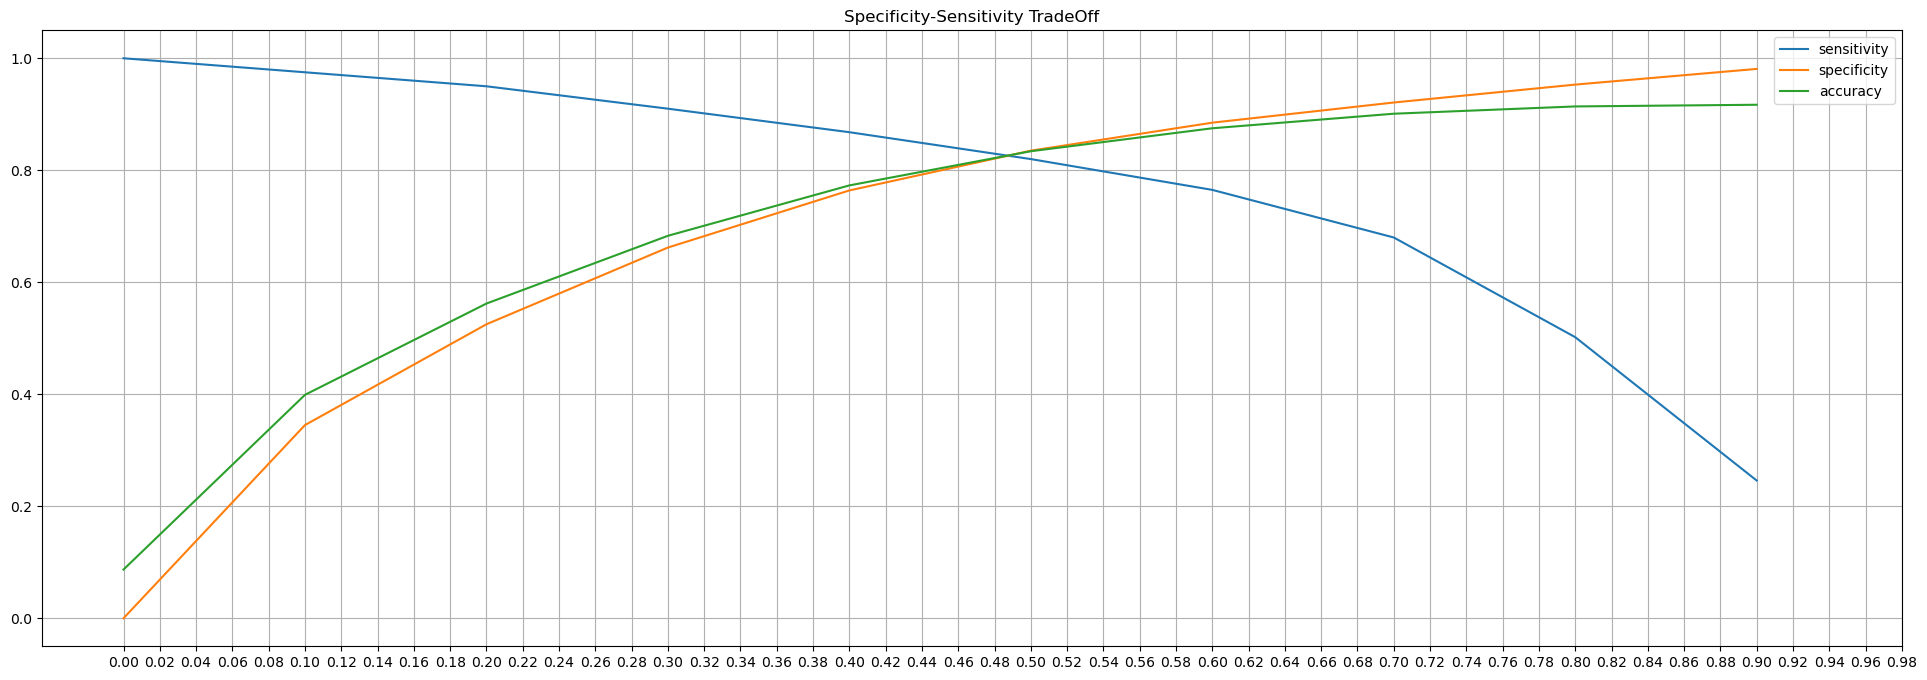

In [516]:
metrics_df.plot(kind='line', figsize=(24,8), grid=True, xticks=np.arange(0,1,0.02),
                title='Specificity-Sensitivity TradeOff');

In [517]:
optimum_cutoff = 0.49
y_train_pred_final = y_train_pred.map(lambda x : 1 if x > optimum_cutoff else 0)
y_test_pred_final = y_test_pred.map(lambda x : 1 if x > optimum_cutoff else 0)

train_matrix = confusion_matrix(y_train, y_train_pred_final)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_final)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[15905  3282]
 [  315  1505]]

Confusion Matrix for test: 
 [[5929 2302]
 [ 197  576]]


In [518]:
print('Train Performance: \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance: 

Accuracy : 0.829
Sensitivity / True Positive Rate / Recall : 0.827
Specificity / True Negative Rate :  0.829
Precision / Positive Predictive Value : 0.314
F1-score : 0.455


Test Performance : 

Accuracy : 0.722
Sensitivity / True Positive Rate / Recall : 0.745
Specificity / True Negative Rate :  0.72
Precision / Positive Predictive Value : 0.2
F1-score : 0.315


In [519]:
from sklearn.metrics import roc_auc_score
print('ROC AUC score for Train : ',round(roc_auc_score(y_train, y_train_pred),3), '\n' )
print('ROC AUC score for Test : ',round(roc_auc_score(y_test, y_test_pred),3) )

ROC AUC score for Train :  0.891 

ROC AUC score for Test :  0.766


In [520]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=100 , class_weight='balanced')
rfe = RFE(lr,n_features_to_select= 15)
results = rfe.fit(X_train,y_train)
results.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False,  True,  True,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,

In [521]:
rfe_support = pd.DataFrame({'Column' : X.columns.to_list(), 'Rank' : rfe.ranking_, 
                                      'Support' :  rfe.support_}).sort_values(by=
                                       'Rank', ascending=True)
rfe_support

,Column,Rank,Support
67,std_ic_t2f_mou_7,1,True
124,sachet_2g_8_0,1,True
35,std_og_t2f_mou_8,1,True
83,total_rech_num_8,1,True
19,loc_og_t2f_mou_7,1,True
40,isd_og_mou_7,1,True
112,sachet_2g_7_0,1,True
81,total_rech_num_6,1,True
53,loc_ic_t2m_mou_8,1,True
110,sachet_3g_8_0,1,True


In [522]:
rfe_selected_columns = rfe_support.loc[rfe_support['Rank'] == 1,'Column'].to_list()
rfe_selected_columns

['std_ic_t2f_mou_7',
 'sachet_2g_8_0',
 'std_og_t2f_mou_8',
 'total_rech_num_8',
 'loc_og_t2f_mou_7',
 'isd_og_mou_7',
 'sachet_2g_7_0',
 'total_rech_num_6',
 'loc_ic_t2m_mou_8',
 'sachet_3g_8_0',
 'std_ic_t2f_mou_8',
 'sachet_2g_6_0',
 'std_ic_t2t_mou_8',
 'loc_ic_t2f_mou_8',
 'std_ic_t2t_mou_7']

In [524]:
import statsmodels.api as sm 

logr = sm.GLM(y_train,(sm.add_constant(X_train[rfe_selected_columns])), family = sm.families.Binomial())
logr_fit = logr.fit()
logr_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20991
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4567.7
Date:                Sun, 07 Apr 2024   Deviance:                       9135.5
Time:                        10:52:44   Pearson chi2:                 1.30e+07
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1432
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.9580      0.210     -9.337      0.000      -2.369      -1.547
std_ic_t2f_mou_7     0.0224      0.005      4.095      0.000       0.012       0.033
sachet_2g_8_0        0.2411      0.103      2.347      0.019       0.040       0.442
std_og_t2f_mou_8    -0.0357      0.012     -3.043      0.002      -0.059      -0.013
total_rech_num_8    -0.1222      0.006    -20.590      0.000      -0.134      -0.111
loc_og_t2f_mou_7    -0.0066      0.004     -1.865      0.062      -0.013       0.000
isd_og_mou_7         0.0129      0.005      2.575      0.010       0.003       0.023
sachet_2g_7_0        0.0494      0.098      0.505      0.614      -0.142       0.241
total_rech_num_6     0.0535      0.003     15.801      0.000       0.047       0.060
loc_ic_t2m_mou_8    -0.0129      0.001    -20.692      0.000      -0.014      -0.012
sachet_3g_8_0        0.7089      0.196      3.624      0.000       0.325       1.092
std_ic_t2f_mou_8    -0.0418      0.011     -3.935      0.000      -0.063      -0.021
sachet_2g_6_0        0.0084      0.094      0.090      0.929      -0.176       0.193
std_ic_t2t_mou_8    -0.0144      0.002     -7.181      0.000      -0.018      -0.010
loc_ic_t2f_mou_8    -0.0192      0.004     -5.388      0.000      -0.026      -0.012
std_ic_t2t_mou_7     0.0077      0.001      7.087      0.000       0.006       0.010
====================================================================================
"""

In [526]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(X_train, logr_fit, selected_columns) : 
    vif = pd.DataFrame()
    vif['Features'] = rfe_selected_columns
    vif['VIF'] = [variance_inflation_factor(X_train[selected_columns].values, i) for i in range(X_train[selected_columns].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.set_index('Features')
    vif['P-value'] = round(logr_fit.pvalues,4)
    vif = vif.sort_values(by = ["VIF",'P-value'], ascending = [False,False])
    return vif

vif(X_train, logr_fit, rfe_selected_columns)

,VIF,P-value
Features,,
sachet_3g_8_0,9.71,0.0003
sachet_2g_7_0,9.20,0.6137
sachet_2g_6_0,9.13,0.9287
sachet_2g_8_0,7.54,0.0189
total_rech_num_6,4.32,0.0000
total_rech_num_8,3.61,0.0000
std_ic_t2t_mou_8,2.38,0.0000
std_ic_t2t_mou_7,2.38,0.0000
loc_ic_t2m_mou_8,1.94,0.0000


In [528]:
selected_columns = rfe_selected_columns
selected_columns.remove('sachet_2g_6_0')
selected_columns

['std_ic_t2f_mou_7',
 'sachet_2g_8_0',
 'std_og_t2f_mou_8',
 'total_rech_num_8',
 'loc_og_t2f_mou_7',
 'isd_og_mou_7',
 'sachet_2g_7_0',
 'total_rech_num_6',
 'loc_ic_t2m_mou_8',
 'sachet_3g_8_0',
 'std_ic_t2f_mou_8',
 'std_ic_t2t_mou_8',
 'loc_ic_t2f_mou_8',
 'std_ic_t2t_mou_7']

In [529]:
logr2 = sm.GLM(y_train,(sm.add_constant(X_train[selected_columns])), family = sm.families.Binomial())
logr2_fit = logr2.fit()
logr2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20992
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4567.8
Date:                Sun, 07 Apr 2024   Deviance:                       9135.5
Time:                        10:53:48   Pearson chi2:                 1.30e+07
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1432
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.9561      0.209     -9.377      0.000      -2.365      -1.547
std_ic_t2f_mou_7     0.0224      0.005      4.094      0.000       0.012       0.033
sachet_2g_8_0        0.2430      0.101      2.417      0.016       0.046       0.440
std_og_t2f_mou_8    -0.0357      0.012     -3.042      0.002      -0.059      -0.013
total_rech_num_8    -0.1221      0.006    -20.635      0.000      -0.134      -0.111
loc_og_t2f_mou_7    -0.0066      0.004     -1.864      0.062      -0.013       0.000
isd_og_mou_7         0.0129      0.005      2.575      0.010       0.003       0.023
sachet_2g_7_0        0.0531      0.088      0.601      0.548      -0.120       0.226
total_rech_num_6     0.0535      0.003     16.001      0.000       0.047       0.060
loc_ic_t2m_mou_8    -0.0129      0.001    -20.692      0.000      -0.014      -0.012
sachet_3g_8_0        0.7096      0.195      3.630      0.000       0.326       1.093
std_ic_t2f_mou_8    -0.0418      0.011     -3.936      0.000      -0.063      -0.021
std_ic_t2t_mou_8    -0.0144      0.002     -7.181      0.000      -0.018      -0.010
loc_ic_t2f_mou_8    -0.0193      0.004     -5.390      0.000      -0.026      -0.012
std_ic_t2t_mou_7     0.0077      0.001      7.089      0.000       0.006       0.010
====================================================================================
"""

In [530]:
vif(X_train, logr2_fit, selected_columns)

,VIF,P-value
Features,,
sachet_3g_8_0,9.06,0.0003
sachet_2g_8_0,7.12,0.0156
sachet_2g_7_0,7.03,0.5481
total_rech_num_6,4.27,0.0000
total_rech_num_8,3.56,0.0000
std_ic_t2t_mou_8,2.38,0.0000
std_ic_t2t_mou_7,2.38,0.0000
loc_ic_t2m_mou_8,1.94,0.0000
std_ic_t2f_mou_8,1.88,0.0001


In [531]:
selected_columns.remove('sachet_2g_7_0')
selected_columns

['std_ic_t2f_mou_7',
 'sachet_2g_8_0',
 'std_og_t2f_mou_8',
 'total_rech_num_8',
 'loc_og_t2f_mou_7',
 'isd_og_mou_7',
 'total_rech_num_6',
 'loc_ic_t2m_mou_8',
 'sachet_3g_8_0',
 'std_ic_t2f_mou_8',
 'std_ic_t2t_mou_8',
 'loc_ic_t2f_mou_8',
 'std_ic_t2t_mou_7']

In [532]:
logr3 = sm.GLM(y_train,(sm.add_constant(X_train[selected_columns])), family = sm.families.Binomial())
logr3_fit = logr3.fit()
logr3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20993
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4567.9
Date:                Sun, 07 Apr 2024   Deviance:                       9135.9
Time:                        10:54:25   Pearson chi2:                 1.31e+07
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1431
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.9359      0.206     -9.402      0.000      -2.340      -1.532
std_ic_t2f_mou_7     0.0224      0.005      4.091      0.000       0.012       0.033
sachet_2g_8_0        0.2667      0.093      2.879      0.004       0.085       0.448
std_og_t2f_mou_8    -0.0357      0.012     -3.041      0.002      -0.059      -0.013
total_rech_num_8    -0.1221      0.006    -20.630      0.000      -0.134      -0.111
loc_og_t2f_mou_7    -0.0065      0.004     -1.859      0.063      -0.013       0.000
isd_og_mou_7         0.0129      0.005      2.577      0.010       0.003       0.023
total_rech_num_6     0.0533      0.003     16.005      0.000       0.047       0.060
loc_ic_t2m_mou_8    -0.0129      0.001    -20.693      0.000      -0.014      -0.012
sachet_3g_8_0        0.7161      0.195      3.669      0.000       0.334       1.099
std_ic_t2f_mou_8    -0.0418      0.011     -3.936      0.000      -0.063      -0.021
std_ic_t2t_mou_8    -0.0144      0.002     -7.180      0.000      -0.018      -0.010
loc_ic_t2f_mou_8    -0.0193      0.004     -5.390      0.000      -0.026      -0.012
std_ic_t2t_mou_7     0.0077      0.001      7.084      0.000       0.006       0.010
====================================================================================
"""

In [533]:
vif(X_train, logr3_fit, selected_columns)

,VIF,P-value
Features,,
sachet_3g_8_0,7.87,0.0002
sachet_2g_8_0,5.34,0.0040
total_rech_num_6,4.26,0.0000
total_rech_num_8,3.55,0.0000
std_ic_t2t_mou_8,2.38,0.0000
std_ic_t2t_mou_7,2.38,0.0000
loc_ic_t2m_mou_8,1.94,0.0000
std_ic_t2f_mou_8,1.88,0.0001
std_ic_t2f_mou_7,1.81,0.0000


In [534]:
logr3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20993
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4567.9
Date:                Sun, 07 Apr 2024   Deviance:                       9135.9
Time:                        10:54:35   Pearson chi2:                 1.31e+07
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1431
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.9359      0.206     -9.402      0.000      -2.340      -1.532
std_ic_t2f_mou_7     0.0224      0.005      4.091      0.000       0.012       0.033
sachet_2g_8_0        0.2667      0.093      2.879      0.004       0.085       0.448
std_og_t2f_mou_8    -0.0357      0.012     -3.041      0.002      -0.059      -0.013
total_rech_num_8    -0.1221      0.006    -20.630      0.000      -0.134      -0.111
loc_og_t2f_mou_7    -0.0065      0.004     -1.859      0.063      -0.013       0.000
isd_og_mou_7         0.0129      0.005      2.577      0.010       0.003       0.023
total_rech_num_6     0.0533      0.003     16.005      0.000       0.047       0.060
loc_ic_t2m_mou_8    -0.0129      0.001    -20.693      0.000      -0.014      -0.012
sachet_3g_8_0        0.7161      0.195      3.669      0.000       0.334       1.099
std_ic_t2f_mou_8    -0.0418      0.011     -3.936      0.000      -0.063      -0.021
std_ic_t2t_mou_8    -0.0144      0.002     -7.180      0.000      -0.018      -0.010
loc_ic_t2f_mou_8    -0.0193      0.004     -5.390      0.000      -0.026      -0.012
std_ic_t2t_mou_7     0.0077      0.001      7.084      0.000       0.006       0.010
====================================================================================
"""

In [535]:
selected_columns

['std_ic_t2f_mou_7',
 'sachet_2g_8_0',
 'std_og_t2f_mou_8',
 'total_rech_num_8',
 'loc_og_t2f_mou_7',
 'isd_og_mou_7',
 'total_rech_num_6',
 'loc_ic_t2m_mou_8',
 'sachet_3g_8_0',
 'std_ic_t2f_mou_8',
 'std_ic_t2t_mou_8',
 'loc_ic_t2f_mou_8',
 'std_ic_t2t_mou_7']

In [536]:
y_train_pred_lr = logr3_fit.predict(sm.add_constant(X_train[selected_columns]))
y_train_pred_lr.head()

mobile_number
7000166926    0.058303
7001343085    0.005953
7001863283    0.191035
7002275981    0.023816
7001086221    0.000427
dtype: float64

In [537]:
y_test_pred_lr = logr3_fit.predict(sm.add_constant(X_test[selected_columns]))
y_test_pred_lr.head()

mobile_number
7002242818    0.003604
7000517161    0.563302
7002162382    0.123841
7002152271    0.213622
7002058655    0.076482
dtype: float64

In [549]:
y_train_pred_thres = pd.DataFrame(index=y_train.index)
thresholds = [float(x)/10 for x in range(10)]

def thresholder(x, thresh) :
    if x > thresh : 
        return 1 
    else : 
        return 0

    
for i in thresholds:
    y_train_pred_thres[i]= y_train_pred_lr.map(lambda x : thresholder(x,i))
y_train_pred_thres.head()

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
mobile_number,,,,,,,,,,
7000166926,1,0,0,0,0,0,0,0,0,0
7001343085,1,0,0,0,0,0,0,0,0,0
7001863283,1,1,0,0,0,0,0,0,0,0
7002275981,1,0,0,0,0,0,0,0,0,0
7001086221,1,0,0,0,0,0,0,0,0,0


In [550]:
logr_metrics_df = pd.DataFrame(columns=['sensitivity', 'specificity', 'accuracy'])
for thres,column in zip(thresholds,y_train_pred_thres.columns.to_list()) : 
    confusion = confusion_matrix(y_train, y_train_pred_thres.loc[:,column])
    sensitivity,specificity,accuracy = model_metrics_thres(confusion)
    logr_metrics_df =  logr_metrics_df.append({ 
        'sensitivity' :sensitivity,
        'specificity' : specificity,
        'accuracy' : accuracy
    }, ignore_index = True)
    
logr_metrics_df.index = thresholds
logr_metrics_df

,sensitivity,specificity,accuracy
0.0,1.000,0.000,0.087
0.1,0.798,0.765,0.768
0.2,0.666,0.908,0.887
0.3,0.465,0.967,0.923
0.4,0.249,0.987,0.923
0.5,0.124,0.993,0.918
0.6,0.068,0.997,0.917
0.7,0.032,0.999,0.915
0.8,0.007,1.000,0.914
0.9,0.000,1.000,0.913


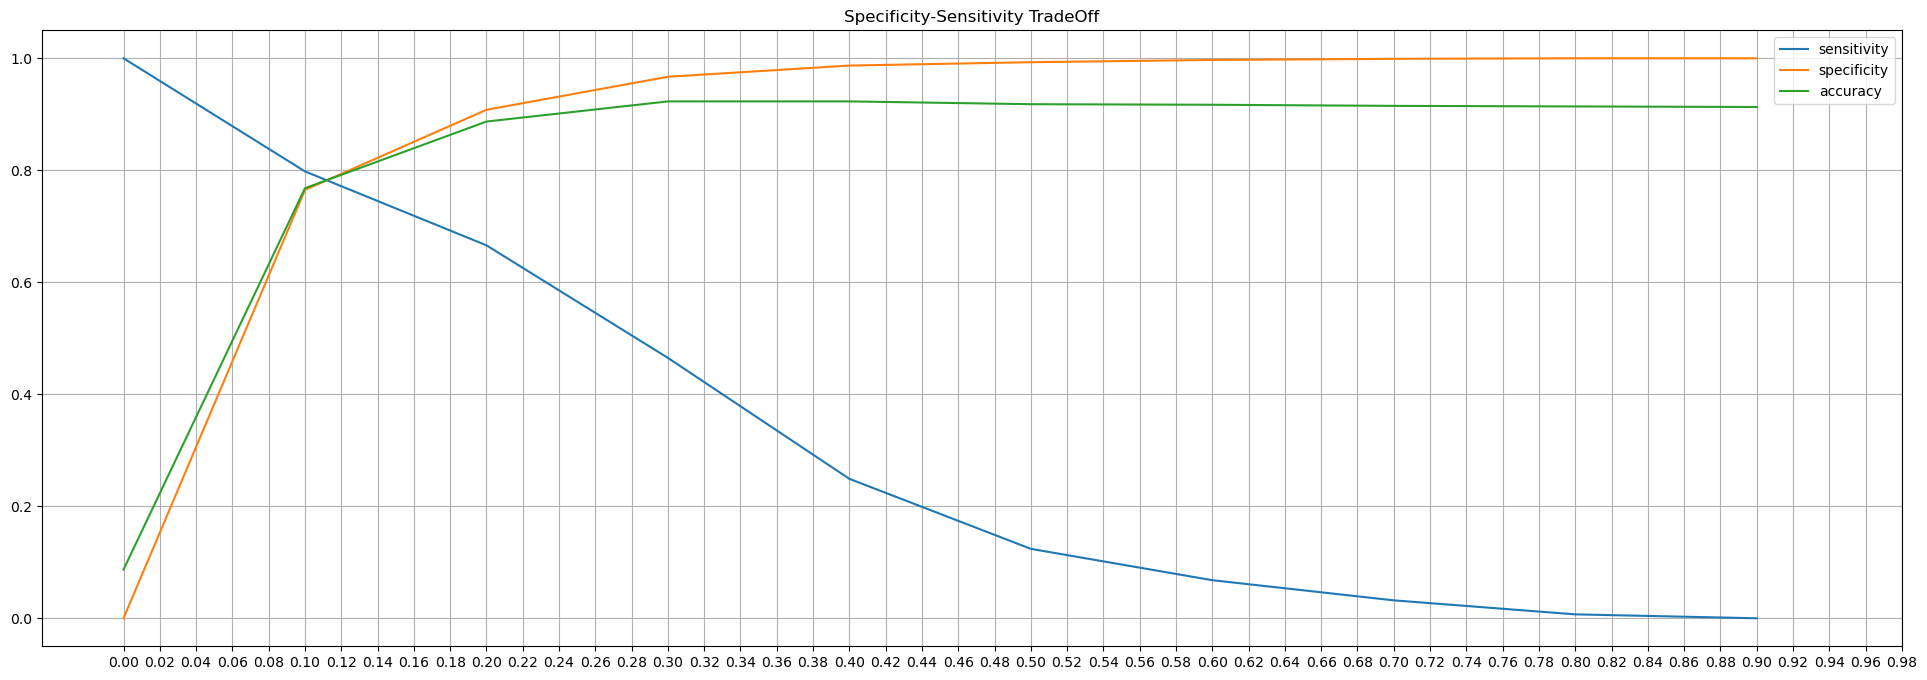

In [551]:
logr_metrics_df.plot(kind='line', figsize=(24,8), grid=True, xticks=np.arange(0,1,0.02),
                title='Specificity-Sensitivity TradeOff');

In [553]:
optimum_cutoff = 0.53
y_train_pred_lr_final = y_train_pred_lr.map(lambda x : 1 if x > optimum_cutoff else 0)
y_test_pred_lr_final = y_test_pred_lr.map(lambda x : 1 if x > optimum_cutoff else 0)

train_matrix = confusion_matrix(y_train, y_train_pred_lr_final)
print('Confusion Matrix for train:\n', train_matrix)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_final)
print('\nConfusion Matrix for test: \n', test_matrix)

Confusion Matrix for train:
 [[19093    94]
 [ 1625   195]]

Confusion Matrix for test: 
 [[8178   53]
 [ 688   85]]


In [554]:
print('Train Performance: \n')
model_metrics(train_matrix)

print('\n\nTest Performance : \n')
model_metrics(test_matrix)

Train Performance: 

Accuracy : 0.918
Sensitivity / True Positive Rate / Recall : 0.107
Specificity / True Negative Rate :  0.995
Precision / Positive Predictive Value : 0.675
F1-score : 0.185


Test Performance : 

Accuracy : 0.918
Sensitivity / True Positive Rate / Recall : 0.11
Specificity / True Negative Rate :  0.994
Precision / Positive Predictive Value : 0.616
F1-score : 0.187


In [556]:
print('ROC AUC score for Train : ',round(roc_auc_score(y_train, y_train_pred_lr),3), '\n' )
print('ROC AUC score for Test : ',round(roc_auc_score(y_test, y_test_pred_lr),3) )

ROC AUC score for Train :  0.864 

ROC AUC score for Test :  0.784


In [557]:
lr_summary_html = logr3_fit.summary().tables[1].as_html()
lr_results = pd.read_html(lr_summary_html, header=0, index_col=0)[0]
coef_column = lr_results.columns[0]
print('Most important predictors of Churn , in order of importance and their coefficients are as follows : \n')
lr_results.sort_values(by=coef_column, key=lambda x: abs(x), ascending=False)['coef']

Most important predictors of Churn , in order of importance and their coefficients are as follows : 



const              -1.9359
sachet_3g_8_0       0.7161
sachet_2g_8_0       0.2667
total_rech_num_8   -0.1221
total_rech_num_6    0.0533
std_ic_t2f_mou_8   -0.0418
std_og_t2f_mou_8   -0.0357
std_ic_t2f_mou_7    0.0224
loc_ic_t2f_mou_8   -0.0193
std_ic_t2t_mou_8   -0.0144
isd_og_mou_7        0.0129
loc_ic_t2m_mou_8   -0.0129
std_ic_t2t_mou_7    0.0077
loc_og_t2f_mou_7   -0.0065
Name: coef, dtype: float64

In [558]:
from sklearn.decomposition import PCA 
pca = PCA(random_state = 42) 
pca.fit(X_train)
pca.components_

array([[ 1.65343699e-01,  1.94274187e-01,  1.67421358e-01, ...,
         1.41878944e-06, -1.55775604e-06, -1.87776593e-06],
       [ 6.42000807e-02,  9.34043570e-02,  1.17479590e-01, ...,
        -2.21353607e-06, -1.49102827e-06, -4.04717858e-07],
       [ 2.37204725e-01,  2.71676435e-01,  2.36064972e-01, ...,
        -1.21527748e-06, -3.94942158e-07,  6.58452170e-07],
       ...,
       [ 7.45932233e-06,  1.30001268e-06, -7.85656475e-06, ...,
         5.14976875e-02,  4.63558194e-02,  4.02507341e-02],
       [-0.00000000e+00, -9.42372019e-17, -2.03667747e-17, ...,
         9.56029604e-16,  5.10897961e-16,  3.67545591e-16],
       [ 0.00000000e+00, -2.12814020e-16,  2.57313506e-16, ...,
        -7.49684520e-16, -5.77504865e-16,  5.03712296e-17]])

In [559]:
pca.explained_variance_ratio_

array([2.68612603e-01, 1.59879088e-01, 1.18530199e-01, 1.03280245e-01,
       8.93840375e-02, 6.28982855e-02, 2.62683855e-02, 2.52141399e-02,
       1.85037053e-02, 1.64122703e-02, 1.54893771e-02, 1.16011625e-02,
       1.06459135e-02, 8.55539336e-03, 7.57720383e-03, 6.69682332e-03,
       6.00533154e-03, 5.06755491e-03, 4.50573189e-03, 4.27526177e-03,
       3.41782876e-03, 3.21103004e-03, 2.58705350e-03, 2.09324003e-03,
       2.03350766e-03, 1.86452746e-03, 1.38270444e-03, 1.28506651e-03,
       1.12636679e-03, 1.03326101e-03, 9.45409518e-04, 8.98545495e-04,
       8.69772175e-04, 7.51663404e-04, 6.49420514e-04, 5.58372043e-04,
       4.99075814e-04, 4.94410962e-04, 4.76283860e-04, 4.38078235e-04,
       4.27216694e-04, 4.02361266e-04, 3.45114585e-04, 3.06443121e-04,
       2.46750269e-04, 2.30227431e-04, 1.93003219e-04, 1.68082983e-04,
       1.56793335e-04, 1.45149600e-04, 1.42993948e-04, 1.06464043e-04,
       1.01999104e-04, 8.73219092e-05, 8.36451546e-05, 7.45778071e-05,
      

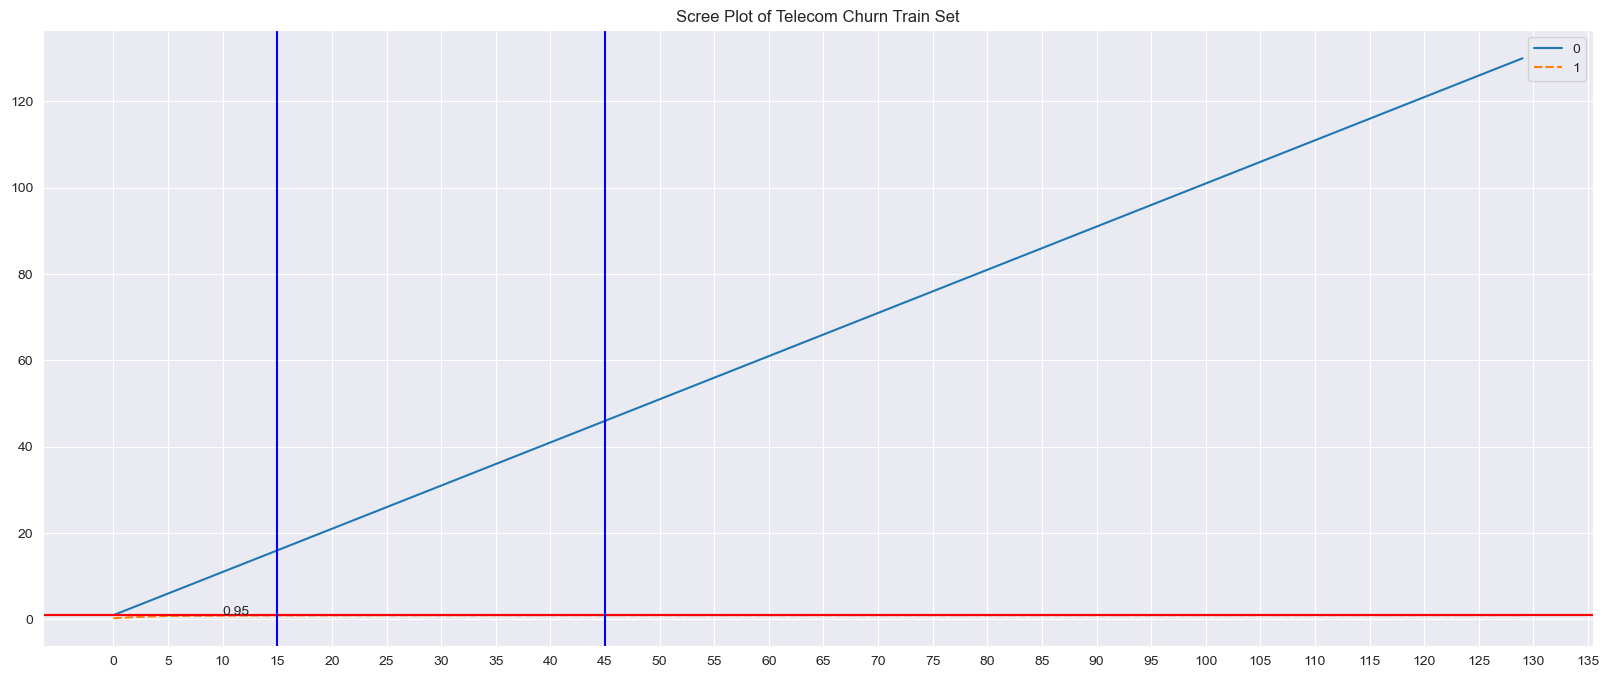

In [562]:
var_cum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(20,8))
sns.set_style('darkgrid')
sns.lineplot(data=(np.arange(1,len(var_cum) + 1), var_cum))
plt.xticks(np.arange(0,140,5))
plt.axhline(0.95,color='r')
plt.axhline(1.0,color='r')
plt.axvline(15,color='b')
plt.axvline(45,color='b')
plt.text(10,0.96,'0.95')

plt.title('Scree Plot of Telecom Churn Train Set');

In [ ]:
pca_final = PCA(n_components=45, random_state=42)
transformed_data = pca_final.fit_transform(X_train)
X_train_pca = pd.DataFrame(transformed_data, columns=["PC_"+str(x) for x in range(1,46)], index = X_train.index)
data_train_pca = pd.concat([X_train_pca, y_train], axis=1)

data_train_pca.head()

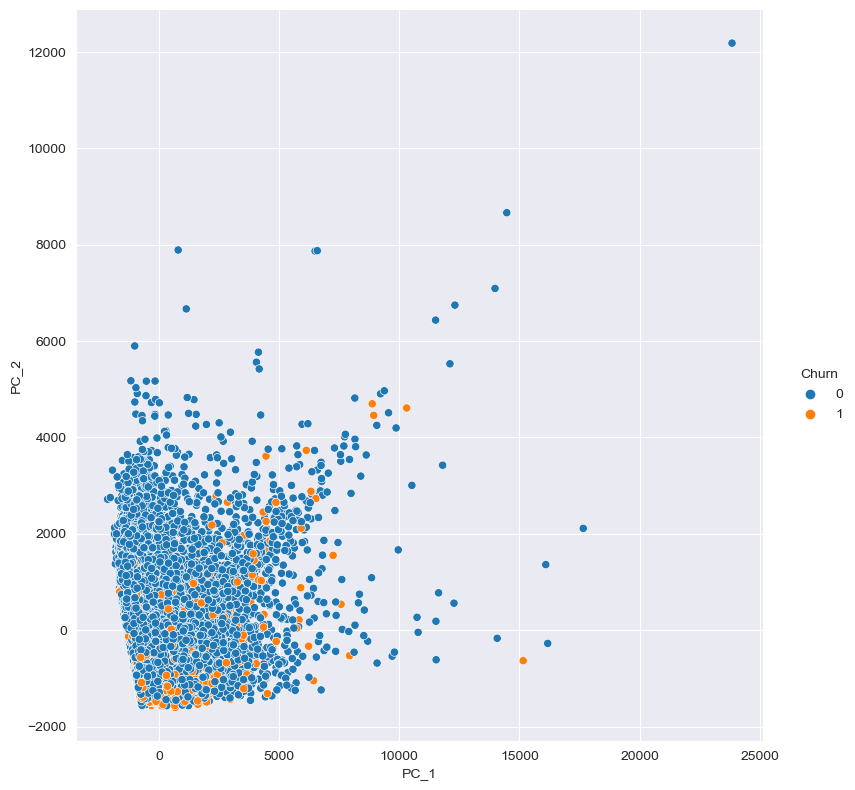

In [335]:
sns.pairplot(data=data_train_pca, x_vars=["PC_1"], y_vars=["PC_2"], hue = "Churn", size=8);


In [ ]:
y_train_pca = data_train_pca.pop('Churn')
X_train_pca = data_train_pca


X_test_pca = pca_final.transform(X_test)


lr_pca = LogisticRegression(random_state=100, class_weight='balanced')
lr_pca.fit(X_train_pca,y_train_pca ) 

In [ ]:
y_train_pred_lr_pca = lr_pca.predict(X_train_pca)
y_train_pred_lr_pca[:5]

In [338]:
X_test_pca = pca_final.transform(X_test)
y_test_pred_lr_pca = lr_pca.predict(X_test_pca)
y_test_pred_lr_pca[:5]

array([1, 1, 1, 0, 0], dtype=int64)

In [339]:
train_matrix = confusion_matrix(y_train, y_train_pred_lr_pca)
test_matrix = confusion_matrix(y_test, y_test_pred_lr_pca)

print('Train Performance :\n')
model_metrics(train_matrix)

print('\nTest Performance :\n')
model_metrics(test_matrix)

Train Performance :

Accuracy : 0.565
Sensitivity / True Positive Rate / Recall : 0.932
Specificity / True Negative Rate :  0.531
Precision / Positive Predictive Value : 0.159
F1-score : 0.272

Test Performance :

Accuracy : 0.568
Sensitivity / True Positive Rate / Recall : 0.918
Specificity / True Negative Rate :  0.535
Precision / Positive Predictive Value : 0.156
F1-score : 0.267
